機率分布函數與抽樣分配
1. 繪製各種分配函數(呈現該函數的分配性質-參數改變造成的形狀改變以及與其他分配的關係)(以pdf圖為主)
   (呈現粗線與線段改變)(圖:大視窗小視窗表達)
2. cdf畫一兩張即可, 記得圖的標題命名
3. 程式碼放重點程式碼就好
4. Binomial, Poisson, Geometric, , Hypergeometric, Exponential, Beta, Gamma, 
   Weibull, Normal, Skew-Normal, t, F, chi-square
   (有加成性的話證明各自的加成性)
5. set.seed生樣本去判斷母體，來判斷母體的分配(懷疑是常態的話用qqplot判斷)
   (左偏右偏不偏的分配個來一組)(觀察每個分配的qqplot圖，右偏跟左偏分配的qqplot有甚麼差別)
6. 抽樣分配的關係(統計量服從分配)(z分配, beta分配, 卡方分配)(比較樣本數造成的影響)
7. 圖注意要存取成eps圖
8. 筆記寫下寫程式的時候要注意的事情、分配的性質、圖要注意看的部分

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2, beta, gamma, expon, t, f, lognorm, binom, hypergeom, laplace, cauchy, geom, poisson
import scipy.stats as stats
img_dir = "D:/vscodepython/Statistical Calculation/Homework3_Distribution/image_hw3/"
#plt.savefig(img_dir+"examplot.eps", format="eps")

Discrete Distribution

Binomial Distribution
1. 分配PMF,CMF性質
2. 二項分配在樣本數夠大時趨近常態分配

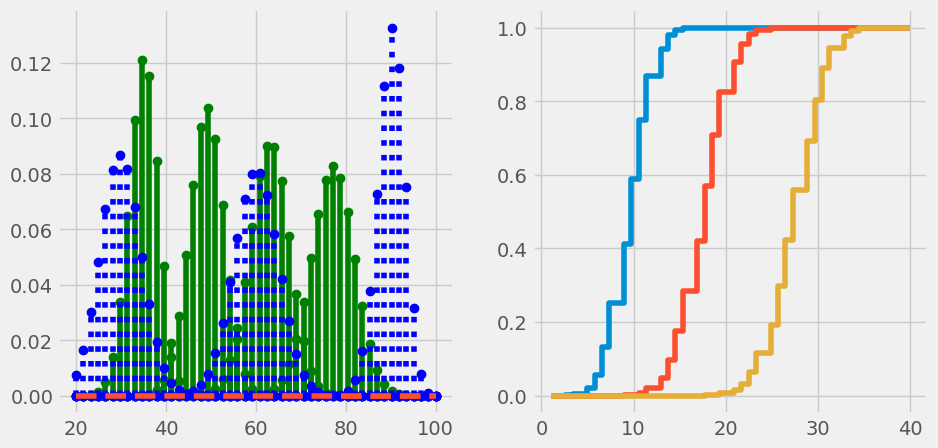

In [1071]:
fig, axes = plt.subplots(1, 2, figsize = [10, 5])

n = np.arange(50, 120, 20)
p = 0.7
x = np.linspace(20, 100, 50)
for i in n:
    y = binom.pmf(x, i, p)
    axes[0].stem(x, y, linefmt='g-', markerfmt='o', basefmt = 'C1--')

n = 100
p = np.arange(0.3, 0.9, 0.3)
for i in p:
    y = binom.pmf(x, n, i)
    axes[0].stem(x, y, linefmt='b:', markerfmt='o', basefmt = 'C1--')

n = np.arange(20, 50, 10)#20 30 40
p = np.arange(0.5, 0.75, 0.1) #0.5 0.6 0.7
x = np.linspace(1, 40, 50)
param = np.vstack((n, p))
param = param.T
for i in range(3):
    Y = binom.cdf(x, param[i][0], param[i][1])
    axes[1].plot(x, Y, drawstyle="steps-pre")

plt.savefig(img_dir+"binom.eps", format="eps")
plt.show()



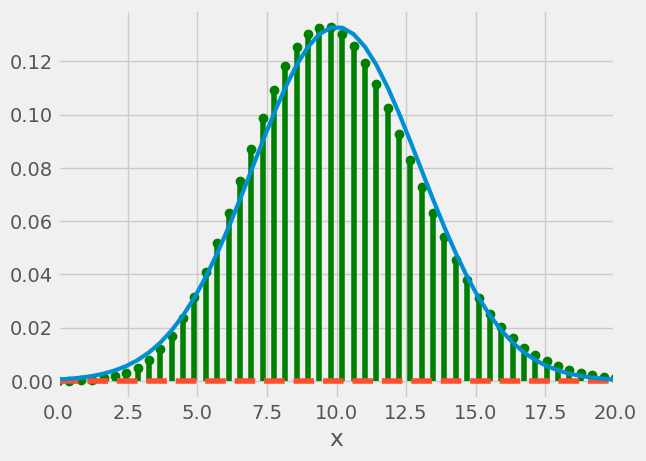

In [1014]:
import numpy as np
import matplotlib.pyplot as plt
# import scipy as sp  # statistics
from scipy.stats import binom, chi2, norm

n, p = 100, 0.1
x = np.linspace(0, 20)
y = binom.pmf(x, n, p)
plt.stem(x, y, linefmt='g-', markerfmt='o', basefmt = 'C1--')

mu = 10
sigma = 3
X = np.linspace(0,20) 
Y = norm.pdf(X, loc=mu, scale=sigma)
plt.xlim(0,20)
plt.plot(X, Y, lw=3) 
plt.xlabel("x")
plt.savefig(img_dir+"binom-norm.eps", format="eps")
plt.show()

Hypergeometric Distribution

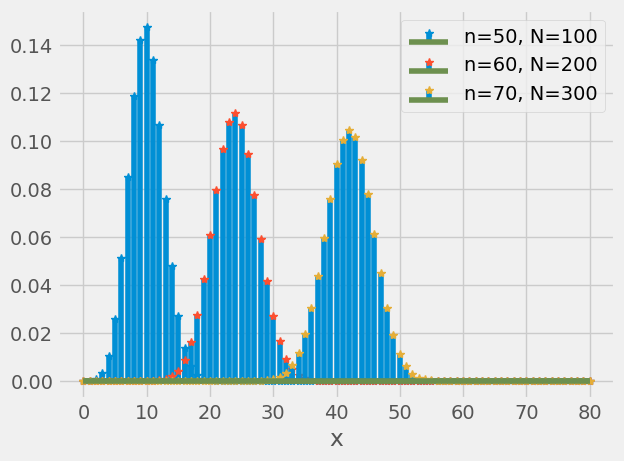

In [1072]:
M = 500 #母體
n = np.arange(50, 75, 10) #想抽的樣本 #50 60 70
N = np.arange(100, 400, 100) #總共要抽的點 #100 200 300
x = np.arange(81) #從想抽的養本抽的點數量
param = np.vstack((n,N))
param = param.T
for i in range(3):
    y = hypergeom.pmf(x, M=M, n=param[i][0], N=param[i][1])
    plt.stem(x, y, linefmt='.-', markerfmt='*', label="n={}, N={}".format(param[i][0], param[i][1]))
plt.xlabel("x")
plt.savefig(img_dir+"hypergeom.eps", format="eps")
plt.legend()
plt.show()


Geometric Distribution

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


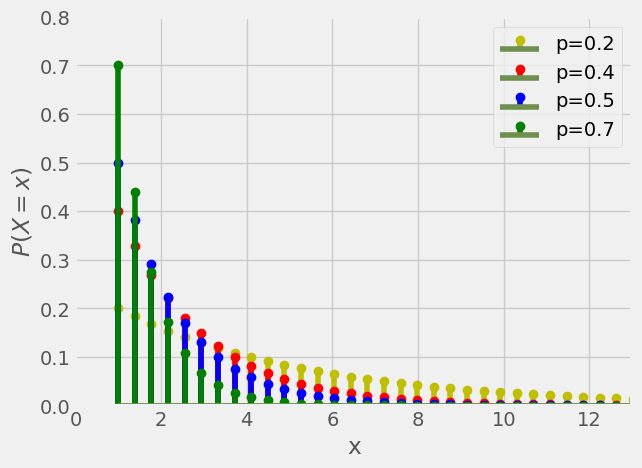

In [1016]:
x = np.linspace(1, 20)
p = 0.2
y = geom.pmf(x, p)
plt.stem(x, y, linefmt='y-', markerfmt='o', label="p=0.2")
p = 0.4
y = geom.pmf(x, p)
plt.stem(x, y, linefmt='r-', markerfmt='o', label="p=0.4")
p = 0.5
y = geom.pmf(x, p)
plt.stem(x, y, linefmt='b-', markerfmt='o', label="p=0.5")
p = 0.7
y = geom.pmf(x, p)
plt.stem(x, y, linefmt='g-', markerfmt='o', label="p=0.7")
plt.ylim(0, 0.8)
plt.xlim(0, 13)
plt.xlabel("x")
plt.ylabel("$P(X=x)$")
plt.legend()
plt.savefig(img_dir+"geom.eps", format="eps")
plt.show()

Poisson Distribution

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


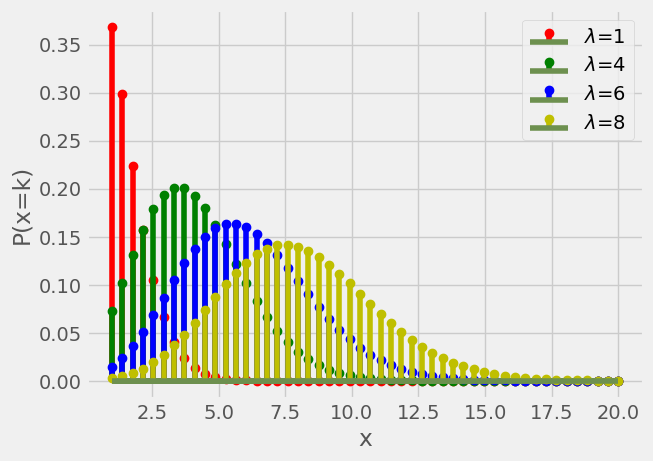

In [1017]:
x = np.linspace(1, 20)
lamb = 1
y = poisson.pmf(x, lamb)
plt.stem(x, y, linefmt='r-', markerfmt='o', label="$\lambda$=1")
lamb = 4
y = poisson.pmf(x, lamb)
plt.stem(x, y, linefmt='g-', markerfmt='o', label="$\lambda$=4")
lamb = 6
y = poisson.pmf(x, lamb)
plt.stem(x, y, linefmt='b-', markerfmt='o', label="$\lambda$=6")
lamb = 8
y = poisson.pmf(x, lamb)
plt.stem(x, y, linefmt='y-', markerfmt='o', label="$\lambda$=8")
plt.legend()
plt.xlabel("x")
plt.ylabel("P(x=k)")
plt.savefig(img_dir+"poisson.eps", format="eps")
plt.show()

Poisson Approximation

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


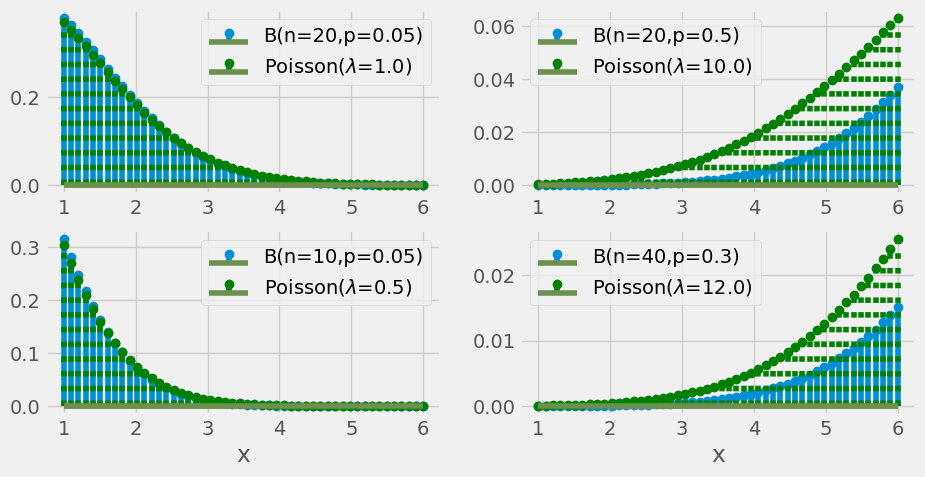

In [1018]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
x = np.linspace(1, 6, 50)

n, p = 20, 0.05
lamb = n*p
y = binom.pmf(x, n, p)
axes[0][0].stem(x, y, label="B(n={},p={})".format(n,p))
y1 = poisson.pmf(x, lamb)
axes[0][0].stem(x, y1, linefmt='g:', label="Poisson($\lambda$={})".format(lamb))
axes[0][0].legend()
axes[0][0].set_xlabel("x")

n, p = 20, 0.5
lamb = n*p
y = binom.pmf(x, n, p)
axes[0][1].stem(x, y, label="B(n={},p={})".format(n,p))
#plt.show()
y1 = poisson.pmf(x, lamb)
axes[0][1].stem(x, y1, linefmt='g:', label="Poisson($\lambda$={})".format(lamb))
axes[0][1].legend()
axes[0][1].set_xlabel("x")


n, p = 10, 0.05
lamb = n*p
y = binom.pmf(x, n, p)
axes[1][0].stem(x, y, label="B(n={},p={})".format(n,p))
y1 = poisson.pmf(x, lamb)
axes[1][0].stem(x, y1, linefmt='g:', label="Poisson($\lambda$={})".format(lamb))
axes[1][0].legend()
axes[1][0].set_xlabel("x")

n, p = 40, 0.3
lamb = n*p
y = binom.pmf(x, n, p)
axes[1][1].stem(x, y, label="B(n={},p={})".format(n,p))
y1 = poisson.pmf(x, lamb)
axes[1][1].stem(x, y1, linefmt='g:', label="Poisson($\lambda$={})".format(lamb))
axes[1][1].legend()
axes[1][1].set_xlabel("x")

plt.savefig(img_dir+"binom-poisson.eps", format="eps")
plt.show()

Poisson Approximate to  Normal Distribution

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


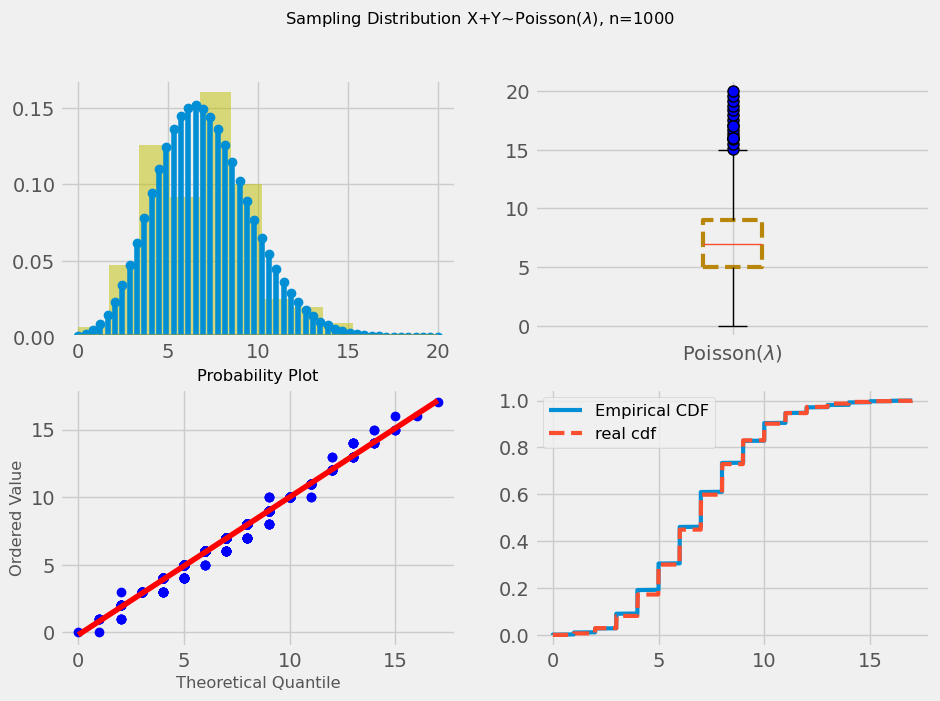

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


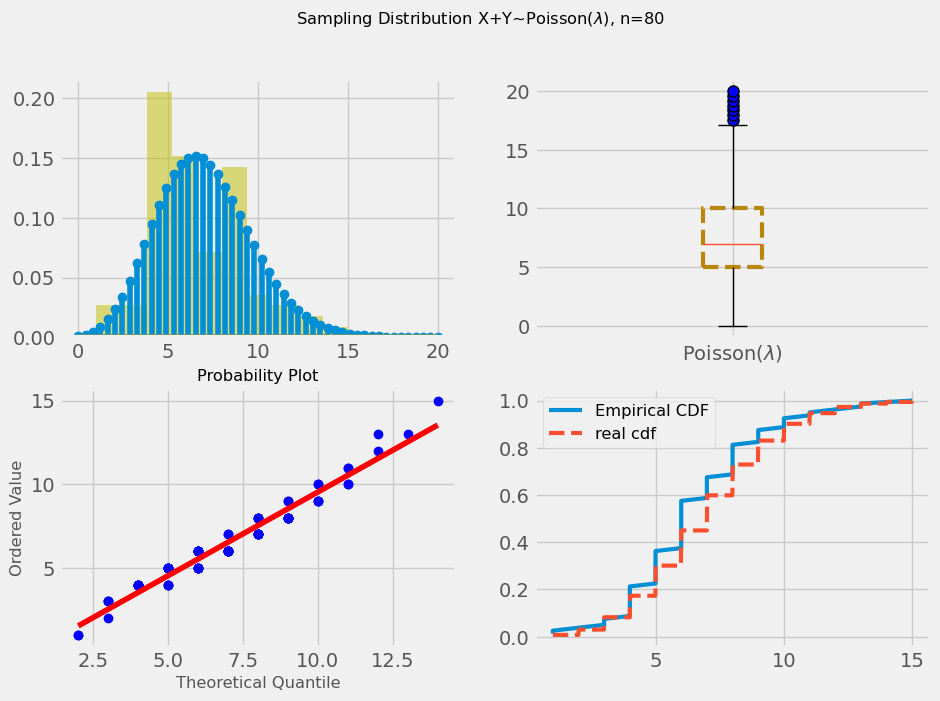

In [1020]:
#SAMPLING DISTRIBUTION
###poisson分配加成性###
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

##直方圖##
np.random.seed(seed=1294)
lamb1 = 3
n = 1000
x1 = poisson.rvs(lamb1, size = n)

lamb2 = 4
x2 = poisson.rvs(lamb2, size = n)

##兩個亂數抽樣分配相加
x4 = x1+x2
bins = 10
axes[0][0].hist(x4, density=True, bins = bins, alpha=0.5, color="y")

###Poisson分配(lamb1+lamb2)
x3 = np.linspace(0, 20, 50)
lamb3 = lamb1+lamb2
y = poisson.pmf(x3, lamb3)
axes[0][0].stem(x3, y)

####boxplot####
boxprops = dict(linestyle = '--', linewidth = 3, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'blue', markersize = 8, linestyle = 'none') 
labels = ["Poisson($\lambda$)"]
axes[0][1].boxplot(np.r_[x3, x4], boxprops = boxprops, flierprops = flierprops, labels = labels)

####QQplot####
stats.probplot(x4, dist = "poisson", sparams=(lamb3), plot=axes[1][0])
axes[1][0].set_title("Probability Plot", fontsize = 'small')
axes[1][0].set_xlabel("Theoretical Quantile", fontsize = 'small')
axes[1][0].set_ylabel("Ordered Value", fontsize = 'small')

##ECDF##
x_sort = np.sort(x4)
F = np.arange(1 ,n+1) / n 
axes[1][1].plot(x_sort, F, lw =3, label = "Empirical CDF")


X = np.linspace(x_sort[0], x_sort[-1], 1000)
y = poisson.cdf(X, lamb3)
axes[1][1].plot(X, y, linestyle="--", lw = 3, label = "real cdf")


plt.legend(fontsize = 'small')
plt.suptitle("Sampling Distribution X+Y~Poisson($\lambda$), n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling poisson n=1000.eps", format="eps")
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(10, 7))

##直方圖##
np.random.seed(seed=1294)
lamb1 = 3
n = 80
x1 = poisson.rvs(lamb1, size = n)

lamb2 = 4
x2 = poisson.rvs(lamb2, size = n)

##兩個亂數抽樣分配相加
x4 = x1+x2
bins = 10
axes[0][0].hist(x4, density=True, bins = bins, alpha=0.5, color="y")

###Poisson分配(lamb1+lamb2)
x3 = np.linspace(0, 20, 50)
lamb3 = lamb1+lamb2
y = poisson.pmf(x3, lamb3)
axes[0][0].stem(x3, y)

####boxplot####
boxprops = dict(linestyle = '--', linewidth = 3, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'blue', markersize = 8, linestyle = 'none') 
labels = ["Poisson($\lambda$)"]
axes[0][1].boxplot(np.r_[x3, x4], boxprops = boxprops, flierprops = flierprops, labels = labels)

####QQplot####
stats.probplot(x4, dist = "poisson", sparams=(lamb3), plot=axes[1][0])
axes[1][0].set_title("Probability Plot", fontsize = 'small')
axes[1][0].set_xlabel("Theoretical Quantile", fontsize = 'small')
axes[1][0].set_ylabel("Ordered Value", fontsize = 'small')

##ECDF##
x_sort = np.sort(x4)
F = np.arange(1 ,n+1) / n 
axes[1][1].plot(x_sort, F, lw =3, label = "Empirical CDF")


X = np.linspace(x_sort[0], x_sort[-1], 1000)
y = poisson.cdf(X, lamb3)
axes[1][1].plot(X, y, linestyle="--", lw = 3, label = "real cdf")


plt.legend(fontsize = 'small')
plt.suptitle("Sampling Distribution X+Y~Poisson($\lambda$), n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling poisson n=80.eps", format="eps")
plt.show()


Continuous Distribution

Chi-squared Distribution
1. 卡方分配pdf
2. 卡方分配與常態分配

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


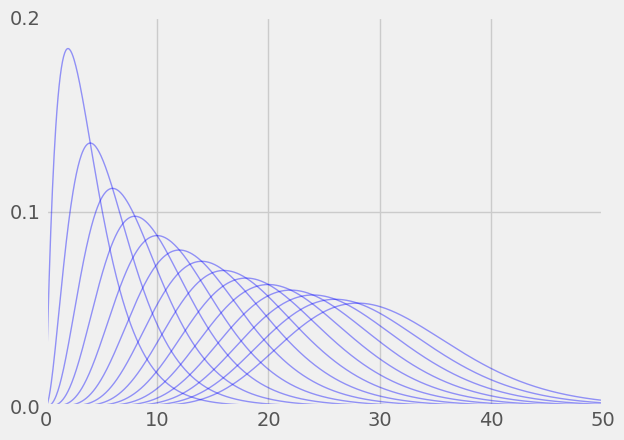

In [1021]:
####卡方分配pdf####
xlim = [0, 50]
x = np.linspace(xlim[0], xlim[1], 1000) 
df = np.arange(4, 32, 2)

plt.figure()
plt.axis([xlim[0], xlim[1], 0, 0.2])
for i in df:
    y = chi2.pdf(x, i)
    plt.plot(x,y, lw=1, color='blue', alpha=0.4)
    
plt.yticks([0, 0.1, 0.2])
plt.savefig(img_dir+"chi-squared.eps", format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


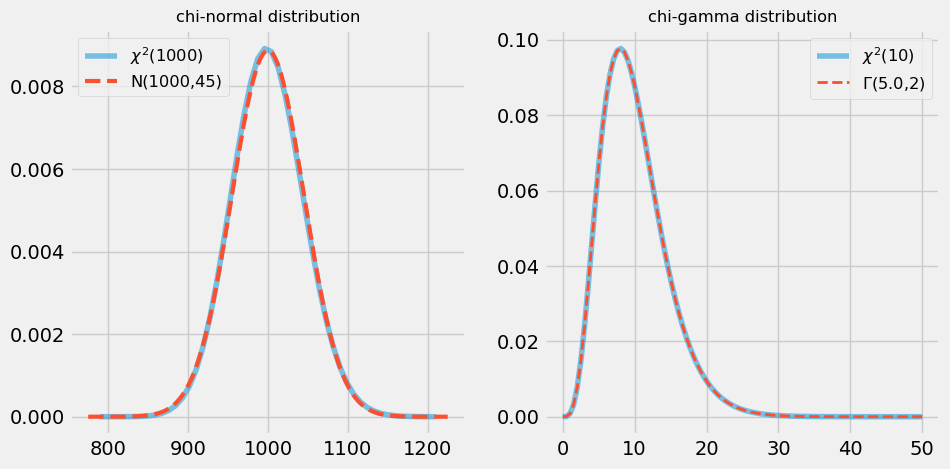

In [15]:
####卡方分配(df=1000)與常態分配(mu=1000,sigma=45)趨近
from scipy.stats import binom, chi2, norm
fig, axes = plt.subplots(1, 2, figsize = [10, 5])

df = 1000
x = np.linspace(790, 1210) 
y = chi2.pdf(x.reshape(-1,1), df=df)

axes[0].plot(x, y, alpha=0.5, label="$\chi^2$({})".format(df))
mu = 1000
sigma = 45
X = np.linspace(mu-5*sigma, mu+5*sigma, 500) 
Y = norm.pdf(X, loc=mu, scale=sigma)
axes[0].plot(X, Y, lw=3,linestyle="--", label="N({},{})".format(mu, sigma)) 
axes[0].set_title("chi-normal distribution", fontsize = 'small')
axes[0].legend(fontsize = 'small', loc="upper left")
#plt.savefig(img_dir+"chi-norm.eps", format="eps")
#plt.show()

####卡方分配(df=v)與珈瑪分配(v/2,2)
v = 10
df = v/2
x = np.linspace(0, 50, 100)
y1 = chi2.pdf(x.reshape(-1,1), df = v)
y2 = gamma.pdf(x, a = df, scale = 2)
axes[1].plot(x, y1, label="$\chi^2$({})".format(v), alpha=0.5)
axes[1].plot(x, y2, linestyle="--", lw=2, label="$\Gamma$({},{})".format(df, 2))
axes[1].set_title("chi-gamma distribution" , fontsize = 'small')

axes[1].legend(fontsize = 'small')
plt.savefig(img_dir+"chi-gamma_norm.eps", format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


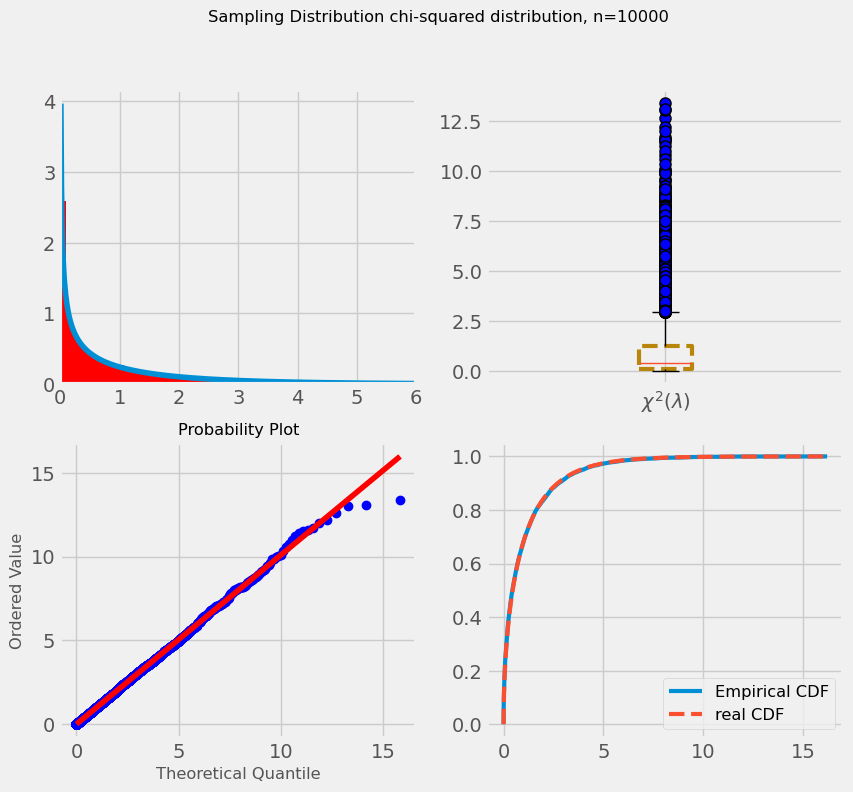

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


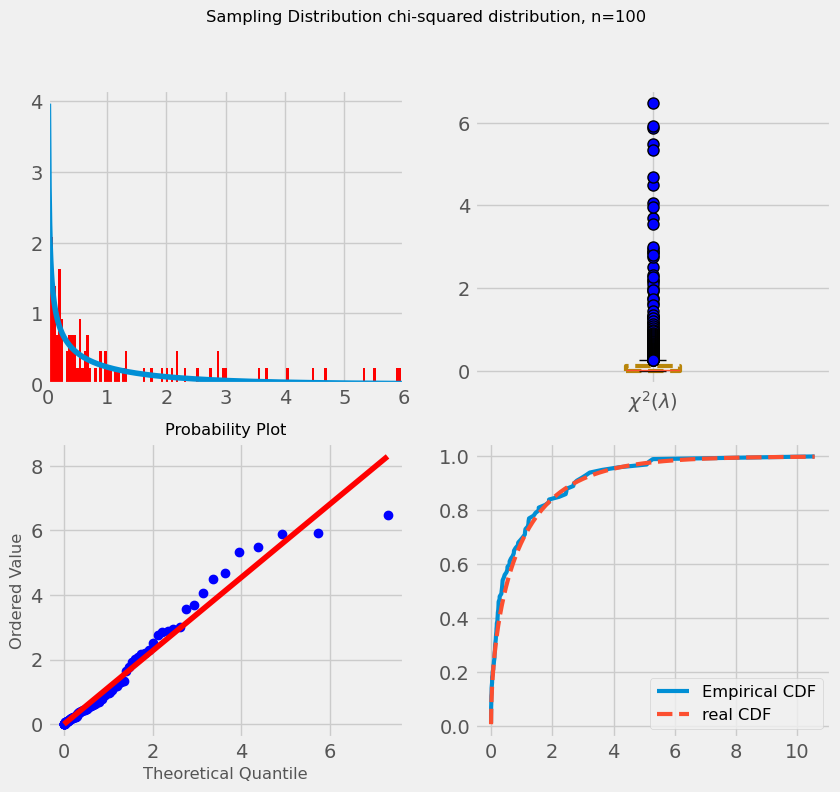

In [1080]:
####常態平方為卡方分配####
import numpy as np
from scipy.stats import norm, chi2
from scipy.stats import cumfreq  # for ECDF
fig, axes = plt.subplots(2, 2, figsize = [9, 8])

####histogram####
n = 10000
x = norm.rvs(loc = 0, scale = 1, size = n)
x = x**2
bins = 150
axes[0][0].hist(x, bins = bins, density="TRUE", lw = 3, color = "r")

df = 1
x_z = np.linspace(0, 10, 1000)
z = chi2.pdf(x_z, df = 1)
axes[0][0].plot(x_z, z)
axes[0][0].set_xlim(0, 6)

####boxplot####
boxprops = dict(linestyle = '--', linewidth = 3, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'blue', markersize = 8, linestyle = 'none') 
labels = ["$\chi^2(\lambda)$"]
axes[0][1].boxplot(np.r_[x, z], boxprops = boxprops, flierprops = flierprops, labels = labels)

####QQplot####
stats.probplot(x, dist = "chi2", sparams=(df), plot=axes[1][0])
axes[1][0].set_title("Probability Plot", fontsize = 'small')
axes[1][0].set_xlabel("Theoretical Quantile", fontsize = 'small')
axes[1][0].set_ylabel("Ordered Value", fontsize = 'small')

####ecdf####
x = norm.rvs(loc = 0, scale = 1, size = n)
y = x**2
x_sort = np.sort(y)
F = np.arange(1 ,n+1) / n 
axes[1][1].plot(x_sort, F, lw =3, label="Empirical CDF")

X = np.linspace(x_sort[0], x_sort[-1], 1000)
y = chi2.cdf(X, df=1)
axes[1][1].plot(X, y, linestyle="--", lw = 3, label="real CDF")

plt.legend(fontsize = 'small')
plt.suptitle("Sampling Distribution chi-squared distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-chi-normal-n=10000.eps", format="eps")
plt.show()


#####################################################
##樣本數改變
fig, axes = plt.subplots(2, 2, figsize = [9, 8])
####histogram####
n = 100
x = norm.rvs(loc = 0, scale = 1, size = n)
x = x**2
bins = 150
axes[0][0].hist(x, bins = bins, density="TRUE", lw = 3, color = "r")

df = 1
x_z = np.linspace(0, 10, 1000)
z = chi2.pdf(x_z, df = 1)
axes[0][0].plot(x_z, z)
axes[0][0].set_xlim(0, 6)

####boxplot####
boxprops = dict(linestyle = '--', linewidth = 3, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'blue', markersize = 8, linestyle = 'none') 
labels = ["$\chi^2(\lambda)$"]
axes[0][1].boxplot(np.r_[x, z], boxprops = boxprops, flierprops = flierprops, labels = labels)

####QQplot####
stats.probplot(x, dist = "chi2", sparams=(df), plot=axes[1][0])
axes[1][0].set_title("Probability Plot", fontsize = 'small')
axes[1][0].set_xlabel("Theoretical Quantile", fontsize = 'small')
axes[1][0].set_ylabel("Ordered Value", fontsize = 'small')

####ecdf####
n = 100
x = norm.rvs(loc = 0, scale = 1, size = n)
y = x**2
x_sort = np.sort(y)
F = np.arange(1 ,n+1) / n 
axes[1][1].plot(x_sort, F, lw =3, label="Empirical CDF")

X = np.linspace(x_sort[0], x_sort[-1], 1000)
y = chi2.cdf(X, df=1)
axes[1][1].plot(X, y, linestyle="--", lw = 3, label="real CDF")

plt.legend(fontsize = 'small')
plt.suptitle("Sampling Distribution chi-squared distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-chi-normal-n=100.eps", format="eps")
plt.show()


Exponential Distribution

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


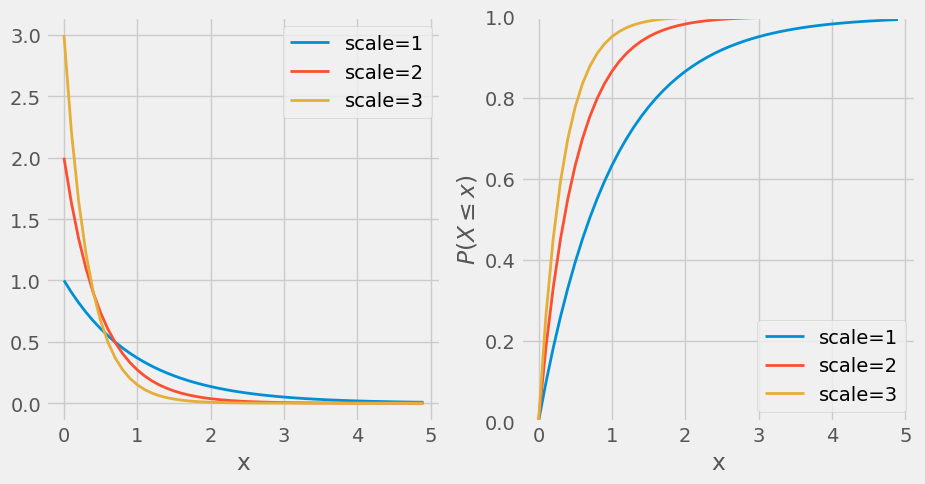

In [1084]:
####指數分配的pdf與cdf圖####
fig, axes = plt.subplots(1, 2, figsize = [10, 5])
x1 = np.arange(0, 5, 0.1) #(15,)
scale = np.arange(1, 4) #(4,)
for i in scale:
    y1 = i * np.exp(-i*x1)
    axes[0].plot(x1, y1, lw=2, label="scale={}".format(i))
    # plt.plot(x1, y1, lw=2, label=["scale={}".format(i) for i in scale] )
axes[0].set_xlabel("x")
axes[0].legend() 

x2 = np.arange(0, 5, 0.1)
for i in scale:
    y2 = 1-np.exp(-i*x2)
    axes[1].plot(x2, y2, lw=2, label="scale={}".format(i))
axes[1].set_ylabel("$P(X \leq x)$")
axes[1].set_xlabel("x")
axes[1].set_ylim(0, 1)
axes[1].legend()
plt.savefig(img_dir+"exp.eps", format="eps")
plt.show()

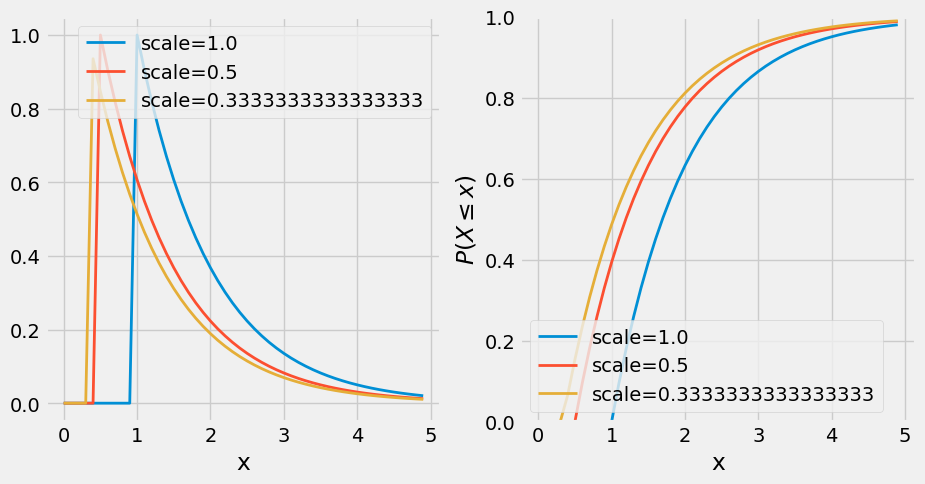

In [16]:
####指數分配的pdf與cdf圖####
fig, axes = plt.subplots(1, 2, figsize = [10, 5])
x1 = np.arange(0, 5, 0.1) #(15,)
scale = 1/np.arange(1, 4) #(4,)
for i in scale:
    y1 = expon.pdf(x1, i)
    axes[0].plot(x1, y1, lw=2, label="scale={}".format(i))
    # plt.plot(x1, y1, lw=2, label=["scale={}".format(i) for i in scale] )
axes[0].set_xlabel("x")
axes[0].legend() 

x2 = np.arange(0, 5, 0.1)
for i in scale:
    y2 = expon.cdf(x2, i)
    axes[1].plot(x2, y2, lw=2, label="scale={}".format(i))
axes[1].set_ylabel("$P(X \leq x)$")
axes[1].set_xlabel("x")
axes[1].set_ylim(0, 1)
axes[1].legend()
#plt.savefig(img_dir+"exp1.eps", format="eps")
plt.show()

Double Exponential Distribution (Laplace Distribution)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


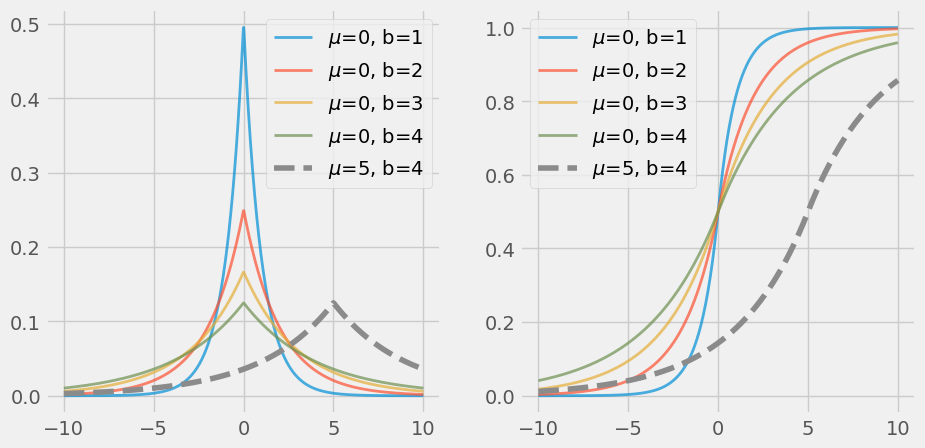

In [1088]:
####laplace pdf####
fig, axes = plt.subplots(1, 2, figsize = [10, 5])

x = np.linspace(-10, 10, 1000)
mu = 0
b = np.arange(1, 5)
for i in b:
    y = laplace.pdf(x, loc=mu, scale=i)
    axes[0].plot(x, y, lw=2, label="$\mu$=0, b={}".format(i), alpha=0.7)

mu = 5
b = 4
y1 = laplace.pdf(x, loc=mu, scale=b)
axes[0].plot(x, y1, label="$\mu$={}, b={}".format(mu,b), linestyle="--")
axes[0].legend()

####laplace cdf####
x = np.linspace(-10, 10, 1000)
mu = 0
b = np.arange(1, 5)
for i in b:
    y = laplace.cdf(x, loc=mu, scale=i)
    axes[1].plot(x, y, lw=2, label="$\mu$=0, b={}".format(i), alpha=0.7)

mu = 5
b = 4
y1 = laplace.cdf(x, loc=mu, scale=b)
axes[1].plot(x, y1, label="$\mu$={}, b={}".format(mu,b), linestyle="--")
plt.legend()
plt.savefig(img_dir+"laplace.eps", format="eps")
plt.show()

Gamma Distribution

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


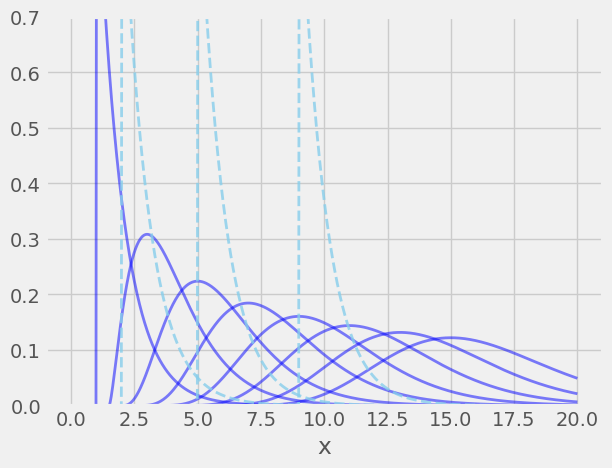

In [1105]:
x = np.linspace(0, 20, 1000)
k = np.arange(1, 13, 1.5)# 0 1.5 3 4.5 6 7.5
theta = np.arange(1, 5, 0.5) #0 0.5 1 1.5 2 2.5 3 3.5 4 4.5
param = np.vstack((k,theta))#(2,6)#矩陣
param = param.T #(6,2)

for i in range(8):
     y = gamma.pdf(x, param[i][0], param[i][1])
     plt.plot(x, y, lw=2, c="blue", alpha=0.5)
     
y = gamma.pdf(x, 1, 2)
plt.plot(x, y, lw=2, linestyle="--", c="skyblue", alpha=0.8)
y = gamma.pdf(x, 1, 5)
plt.plot(x, y, lw=2, linestyle="--", c="skyblue", alpha=0.8)
y = gamma.pdf(x, 1, 9)
plt.plot(x, y, lw=2, linestyle="--", c="skyblue", alpha=0.8)
plt.ylim(0, 0.7)
plt.xlabel("x")
plt.savefig(img_dir+"gamma.eps", format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


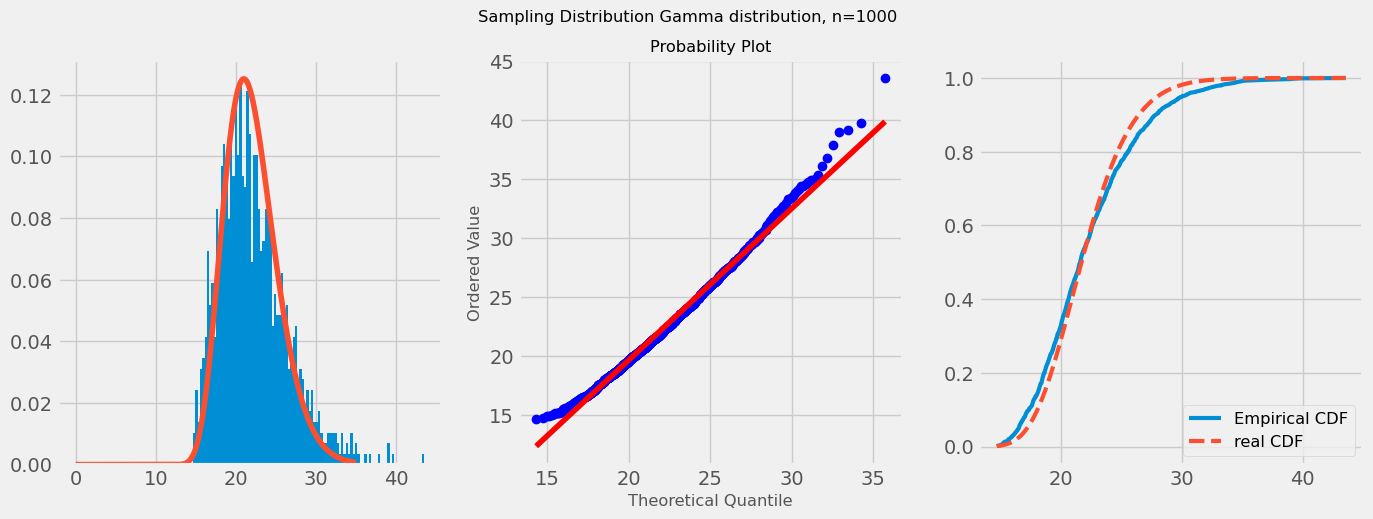

In [1027]:
####gamma分配####
fig, axes = plt.subplots(1, 3, figsize = [15, 5])
alpha1 = 1
beta1 = 10
beta2 = 1
alpha2 = 10
n = 1000
x1 = gamma.rvs(alpha1, beta1, size=n)
x2 = gamma.rvs(alpha2, beta2, size=n)
x1 = np.sort(x1)
x2 = np.sort(x2)
x3 = x1+x2
axes[0].hist(x3, bins=100, density=True)


x4 = np.linspace(0, 35, 1000)
y = gamma.pdf(x4, alpha1+alpha2, beta1+beta2)
axes[0].plot(x4, y)

stats.probplot(x3, dist = "gamma", sparams=(alpha1+alpha2, beta1+beta2), plot=axes[1])
axes[1].set_title("Probability Plot", fontsize = 'small')
axes[1].set_xlabel("Theoretical Quantile", fontsize = 'small')
axes[1].set_ylabel("Ordered Value", fontsize = 'small')

####ecdf####
x_sort = np.sort(x3)
F = np.arange(1 ,n+1) / n 
axes[2].plot(x_sort, F, lw =3, label="Empirical CDF")

X = np.linspace(x_sort[0], x_sort[-1], 1000)
y = gamma.cdf(X, alpha1+alpha2, beta1+beta2)
axes[2].plot(X, y, linestyle="--", lw = 3, label="real CDF")

plt.legend(fontsize = 'small')
plt.suptitle("Sampling Distribution Gamma distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-gamma-n=1000.eps", format="eps")
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


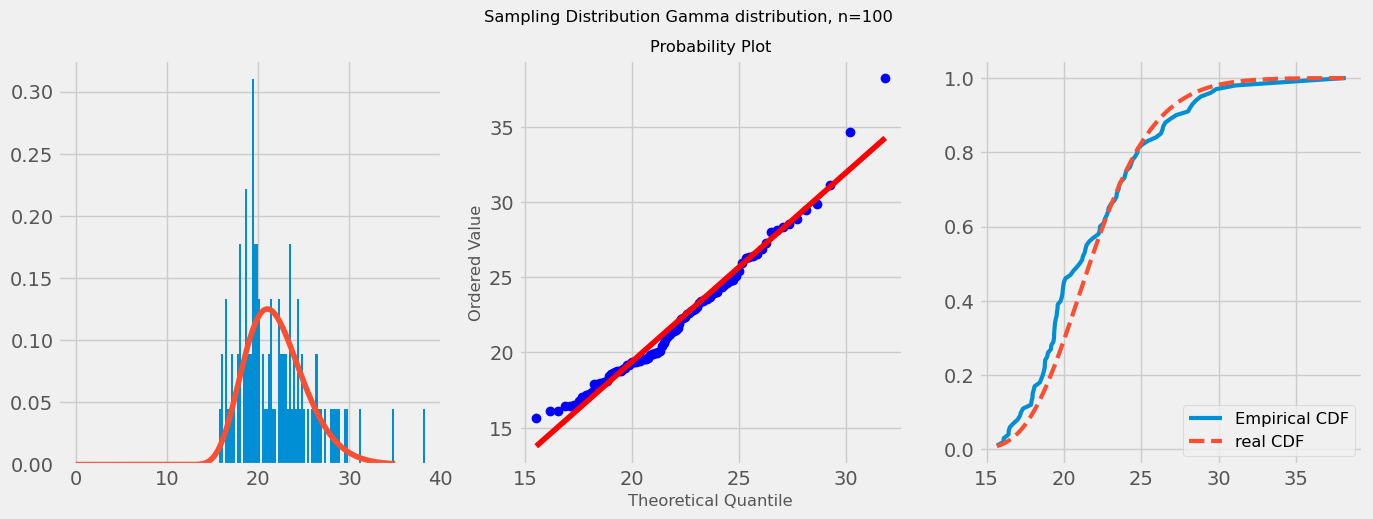

In [1028]:
####gamma分配####
fig, axes = plt.subplots(1, 3, figsize = [15, 5])
alpha1 = 1
beta1 = 10
beta2 = 1
alpha2 = 10
n = 100
x1 = gamma.rvs(alpha1, beta1, size=n)
x2 = gamma.rvs(alpha2, beta2, size=n)
x1 = np.sort(x1)
x2 = np.sort(x2)
x3 = x1+x2
axes[0].hist(x3, bins=100, density=True)


x4 = np.linspace(0, 35, 1000)
y = gamma.pdf(x4, alpha1+alpha2, beta1+beta2)
axes[0].plot(x4, y)

stats.probplot(x3, dist = "gamma", sparams=(alpha1+alpha2, beta1+beta2), plot=axes[1])
axes[1].set_title("Probability Plot", fontsize = 'small')
axes[1].set_xlabel("Theoretical Quantile", fontsize = 'small')
axes[1].set_ylabel("Ordered Value", fontsize = 'small')

####ecdf####
x_sort = np.sort(x3)
F = np.arange(1 ,n+1) / n 
axes[2].plot(x_sort, F, lw =3, label="Empirical CDF")

X = np.linspace(x_sort[0], x_sort[-1], 1000)
y = gamma.cdf(X, alpha1+alpha2, beta1+beta2)
axes[2].plot(X, y, linestyle="--", lw = 3, label="real CDF")

plt.legend(fontsize = 'small')
plt.suptitle("Sampling Distribution Gamma distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-gamma-n=100.eps", format="eps")
plt.show()

Beta Distribution

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


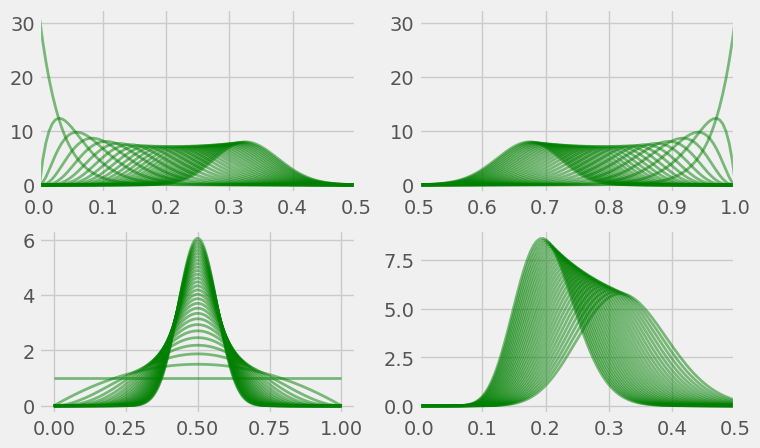

In [1029]:
fig, axes = plt.subplots(2, 2, figsize = [8, 5])

a = np.arange(1, 30)
b = np.arange(31,60)
x = np.linspace(0, 1, 200) #向量
Y = beta.pdf(x.reshape(-1,1), a , b) #矩陣
axes[0][0].plot(x, Y, lw=2, c="g", alpha=0.5)
axes[0][0].set_xlim(0, 0.5)

a = np.arange(31, 60)
b = np.arange(1, 30)
x = np.linspace(0, 1, 200) #向量
Y = beta.pdf(x.reshape(-1,1), a , b) #矩陣
axes[0][1].plot(x, Y, lw=2, c="g", alpha=0.5)
axes[0][1].set_xlim(0.5, 1)

a = np.arange(1, 30)
b = np.arange(1, 30)
x = np.linspace(0, 1, 200) #向量
Y = beta.pdf(x.reshape(-1,1), a , b) #矩陣
axes[1][0].plot(x, Y, lw=2, c="g", alpha=0.5)

a = 15
b = np.arange(31,60)
x = np.linspace(0, 1, 200) #向量
Y = beta.pdf(x.reshape(-1,1), a , b) #矩陣
axes[1][1].plot(x, Y, lw=2, c="g", alpha=0.5)
axes[1][1].set_xlim(0, 0.5)

plt.savefig(img_dir+"beta.eps", format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


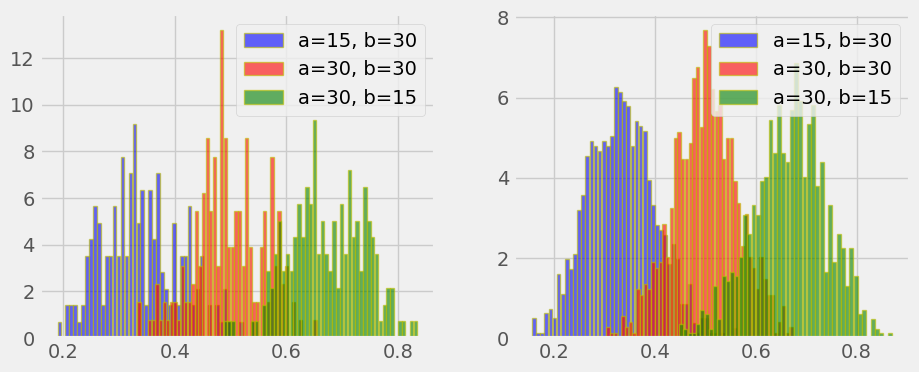

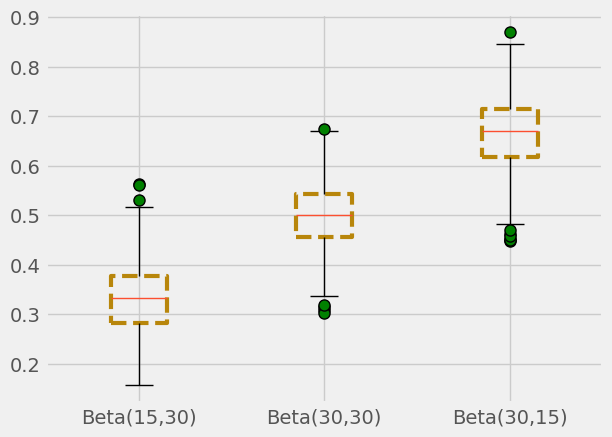

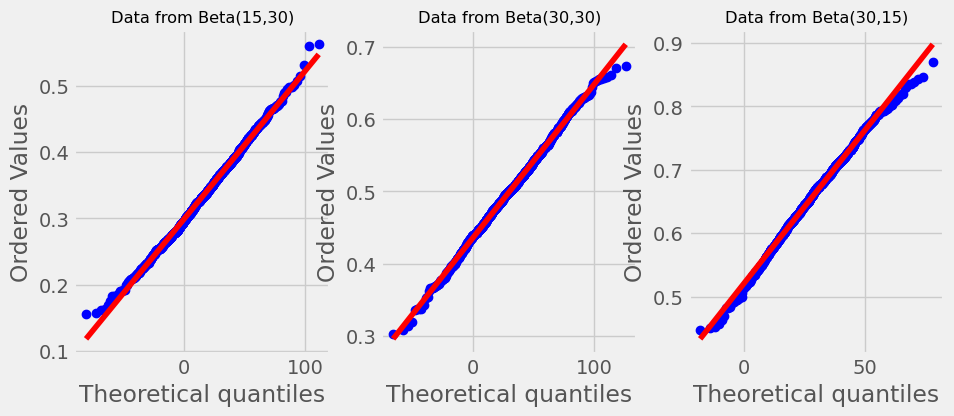

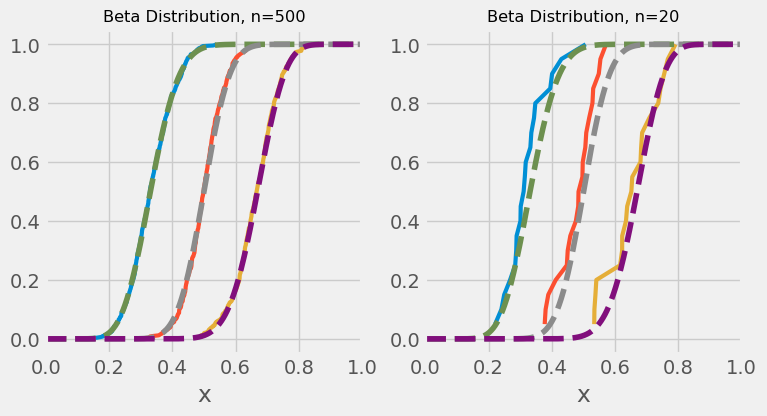

In [1030]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))
a1 = 15
b1 = 30
x1 = beta.rvs(a1, b1, size=200)
axes[0].hist(x1, bins=50, alpha = 0.6, color = 'b', edgecolor = 'y', 
linewidth = 1, density = True, rwidth = 0.9, label="a=15, b=30")
#fig, axes = plt.subplots(2, 2, figsize=[8, 5])
#axes[0][0].hist(x, bins=50, alpha=0.5, density=True)

a2 = 30
b2 = 30
x2 = beta.rvs(a2, b2, size=200)
axes[0].hist(x2, bins=50, alpha = 0.6, color = 'r', edgecolor = 'y', 
linewidth = 1, density = True, rwidth = 0.9, label="a=30, b=30")

a3 = 30
b3 = 15
x3 = beta.rvs(a3, b3, size=200)
axes[0].hist(x3, bins=50, alpha = 0.6, color = 'g', edgecolor = 'y', 
linewidth = 1, density = True, rwidth = 0.9, label="a=30, b=15")
axes[0].legend()


############################################

a1 = 15
b1 = 30
x1 = beta.rvs(a1, b1, size=1000)
axes[1].hist(x1, bins=50, alpha = 0.6, color = 'b', edgecolor = 'y', 
linewidth = 1, density = True, rwidth = 0.9, label="a=15, b=30")
#fig, axes = plt.subplots(2, 2, figsize=[8, 5])
#axes[0][0].hist(x, bins=50, alpha=0.5, density=True)

a2 = 30
b2 = 30
x2 = beta.rvs(a2, b2, size=1000)
axes[1].hist(x2, bins=50, alpha = 0.6, color = 'r', edgecolor = 'y', 
linewidth = 1, density = True, rwidth = 0.9, label="a=30, b=30")

a3 = 30
b3 = 15
x3 = beta.rvs(a3, b3, size=1000)
axes[1].hist(x3, bins=50, alpha = 0.6, color = 'g', edgecolor = 'y', 
linewidth = 1, density = True, rwidth = 0.9, label="a=30, b=15")
axes[1].legend()
plt.savefig(img_dir+"beta-hist.eps", format="eps")
plt.show()

#############################################


####Boxplot####
boxprops = dict(linestyle = '--', linewidth = 3, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green', 
    markersize = 8, linestyle = 'none') # define outliers
labels = ['Beta(15,30)','Beta(30,30)',"Beta(30,15)"]
plt.boxplot(np.c_[x1, x2, x3], boxprops = boxprops,
    flierprops = flierprops, labels = labels)

plt.savefig(img_dir+"beta-boxplt.eps", format="eps")
plt.show()

####QQPLot####
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 4))
stats.probplot(x1, dist = "norm", sparams=(a1, b2), plot = ax1)
stats.probplot(x2, dist = "norm", sparams=(a2, b2), plot = ax2)
stats.probplot(x3, dist = "norm", sparams=(a3, b3), plot = ax3)
# stats.probplot(x2, dist = "chi2", sparams = 2, plot = ax2)
ax1.set_title('Data from Beta({},{})'.format(a1,b1), fontsize = 'small')
ax2.set_title('Data from Beta({},{})'.format(a2,b2), fontsize = 'small')
ax3.set_title('Data from Beta({},{})'.format(a3,b3), fontsize = 'small')

plt.savefig(img_dir+"beta-qqplot.eps", format="eps")
plt.show()


####edcf####
fig, axes = plt.subplots(1, 2, figsize = (8, 4))

n = 500
x1 = beta.rvs(a1, b1, size=n)
x2 = beta.rvs(a2, b2, size=n)
x3 = beta.rvs(a3, b3, size=n)
x_sort1 = np.sort(x1)
F = np.arange(1 ,n+1) / n 
axes[0].plot(x_sort1, F, lw =3)
x_sort2 = np.sort(x2)
axes[0].plot(x_sort2, F, lw =3)
x_sort3 = np.sort(x3)
axes[0].plot(x_sort3, F, lw =3)

x = np.linspace(0, 1 ,1000)
y1 = beta.cdf(x.reshape(-1, 1), a1, b1)
axes[0].plot(x, y1, linestyle="--")
y2 = beta.cdf(x, a2, b2)
axes[0].plot(x, y2, linestyle="--")
y3 = beta.cdf(x, a3, b3)
axes[0].plot(x, y3, linestyle="--")
axes[0].set_xlim(0, 1)
axes[0].set_xlabel("x")
axes[0].set_title("Beta Distribution, n={}".format(n), fontsize = 'small')


####改變樣本數大小
n = 20
x1 = beta.rvs(a1, b1, size=n)
x2 = beta.rvs(a2, b2, size=n)
x3 = beta.rvs(a3, b3, size=n)
x_sort1 = np.sort(x1)
F = np.arange(1 ,n+1) / n 
axes[1].plot(x_sort1, F, lw =3)
x_sort2 = np.sort(x2)
axes[1].plot(x_sort2, F, lw =3)
x_sort3 = np.sort(x3)
axes[1].plot(x_sort3, F, lw =3)

x = np.linspace(0, 1 ,1000)
y1 = beta.cdf(x.reshape(-1, 1), a1, b1)
axes[1].plot(x, y1, linestyle="--")
y2 = beta.cdf(x, a2, b2)
axes[1].plot(x, y2, linestyle="--")
y3 = beta.cdf(x, a3, b3)
axes[1].plot(x, y3, linestyle="--")
axes[1].set_xlim(0, 1)
axes[1].set_title("Beta Distribution, n={}".format(n), fontsize = 'small')
axes[1].set_xlabel("x")
plt.savefig(img_dir+"beta-ecdf-n change.eps", format="eps")
plt.show()


Cauchy Distribution

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


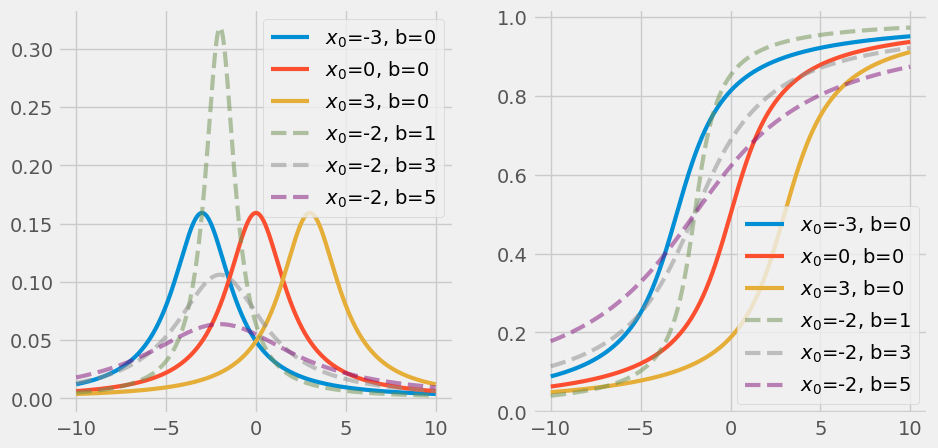

In [1108]:
####cauchy distribution pdf####
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

x = np.linspace(-10, 10, 2000)
y = cauchy.pdf(x, -3, 2)
axes[0].plot(x, y, lw=3, label="$x_0$=-3, b=0")
y = cauchy.pdf(x, 0, 2)
axes[0].plot(x, y, lw=3, label="$x_0$=0, b=0")
y = cauchy.pdf(x, 3, 2)
axes[0].plot(x, y, lw=3, label="$x_0$=3, b=0")
y = cauchy.pdf(x, -2, 1)
axes[0].plot(x, y, lw=3, alpha=0.5, linestyle="--", label="$x_0$=-2, b=1")
y = cauchy.pdf(x, -2, 3)
axes[0].plot(x, y, lw=3, alpha=0.5, linestyle="--", label="$x_0$=-2, b=3")
y = cauchy.pdf(x, -2, 5)
axes[0].plot(x, y, lw=3, alpha=0.5, linestyle="--", label="$x_0$=-2, b=5")
axes[0].legend()

####cdf####
x = np.linspace(-10, 10, 2000)
y = cauchy.cdf(x, -3, 2)
axes[1].plot(x, y, lw=3, label="$x_0$=-3, b=0")
y = cauchy.cdf(x, 0, 2)
axes[1].plot(x, y, lw=3, label="$x_0$=0, b=0")
y = cauchy.cdf(x, 3, 2)
axes[1].plot(x, y, lw=3, label="$x_0$=3, b=0")
y = cauchy.cdf(x, -2, 1)
axes[1].plot(x, y, lw=3, alpha=0.5, linestyle="--", label="$x_0$=-2, b=1")
y = cauchy.cdf(x, -2, 3)
axes[1].plot(x, y, lw=3, alpha=0.5, linestyle="--", label="$x_0$=-2, b=3")
y = cauchy.cdf(x, -2, 5)
axes[1].plot(x, y, lw=3, alpha=0.5, linestyle="--", label="$x_0$=-2, b=5")
plt.legend()
plt.savefig(img_dir+"cauchy.eps", format="eps")
plt.show()



Normal Distribution
1. 常態分配pdf,cdf圖
2. 常態分配亂數圖形

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


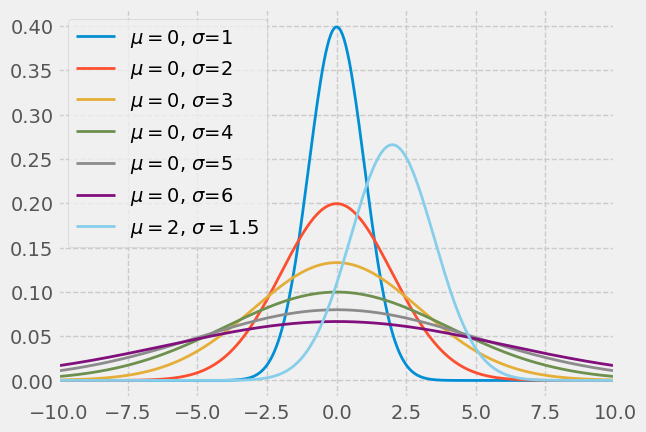

In [1032]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
 
# print(norm.__doc__) # see basic information
mu = 0
#sigma = np.array([1, 2, 3, 4, 5])
sigma = np.arange(1,7)
#xlim = [mu - 5 * sigma, mu + 5 * sigma] #xlim的樣子很奇怪
xlim = [mu - 5 * sigma.max(), mu + 5 * sigma.max()]
x = np.linspace(xlim[0], xlim[1], 1000)
#y = norm.pdf(x, loc=mu, scale=sigma)#error #sigma有5個不能幫忙broadcast
#因為x是1*5矩陣，sigma也是1*5矩陣

#correct answer1
#Y是一個矩陣
Y = norm.pdf(x.reshape(-1,1), loc=mu, scale=sigma)
#plt.plot(x, Y, label=["1","2","3","4","5"])#x是向量Y是矩陣，會自動一個一個對去畫圖
plt.plot(x, Y, label = ["$\mu=0$, $\sigma$={}".format(i) for i in sigma], lw=2)

#correct answer2
#for i in sigma:
#    y = norm.pdf(x, loc=mu, scale=i)
#    plt.plot(x, y, label= "$\sigma$={}".format(i))
mu = 2
sigma = 1.5
y = norm.pdf(x.reshape(-1,1), loc=mu,scale=sigma )
plt.plot(x, y, label="$\mu=${}, $\sigma=${}".format(mu, sigma), lw=2, c="skyblue")

#指定風格
plt.style.use('fivethirtyeight') # 538 style
plt.grid(True, linestyle='--', which='major')
plt.legend() #為了顯示plt.plot的label
plt.xlim(-10, 10)
plt.savefig(img_dir+"normal.eps", format="eps")
plt.show()

t-distribution

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


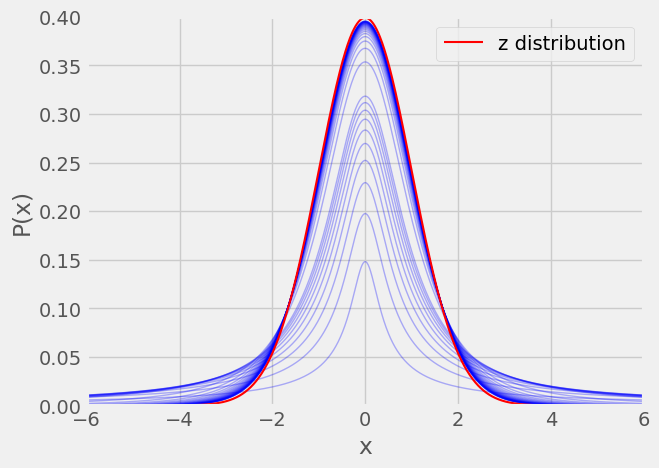

In [1033]:
xlim = [-6, 6]
x = np.linspace(xlim[0], xlim[1], 1000)
 
# df 
df = np.r_[np.arange(0.1, 1, 0.1), np.arange(1, 30)]
# fix xlim before animation
plt.figure()
plt.axis([xlim[0], xlim[1], 0, 0.2])
for i in df:
    y=t.pdf(x, i)
    plt.plot(x,y, lw=1, color='blue', alpha=0.3)#alpha:透明度
    #plt.pause(0.5) #另外建py檔，會變成動圖

z=norm.pdf(x, 0, 1)
plt.plot(x,z, lw=1.5, color="red", label="z distribution")
plt.ylim(0, 0.4)
plt.xlabel("x")
plt.ylabel("P(x)")
#plt.yticks([0, 0.4, 0.05])
plt.legend()
plt.savefig(img_dir+"t-normal.eps", format="eps")
plt.show()

F-distribution

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


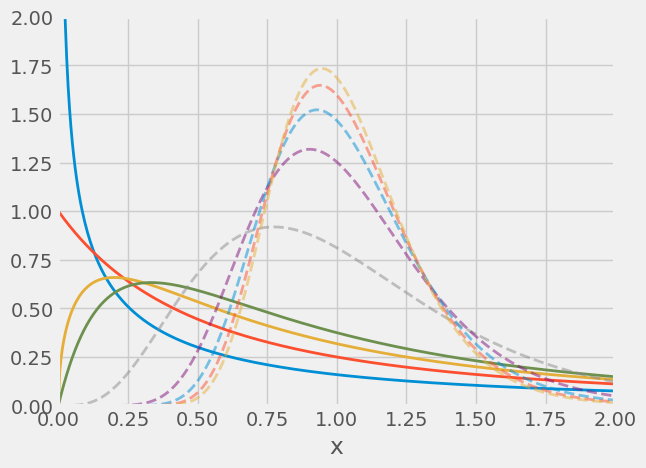

In [1034]:
x = np.linspace(0, 5, 1000)
gamma1 = np.arange(1, 5)
gamma2 = np.arange(1, 5)
param = np.vstack((gamma1, gamma2))
param = param.T
for i in range(4):
    y = f.pdf(x, param[i][0], param[i][1])
    plt.plot(x, y, lw=2)

gamma1 = np.arange(10, 100, 20)
gamma2 = 60
for i in gamma1:
    y = f.pdf(x, i, gamma2)
    plt.plot(x, y, lw=2, alpha=0.5, linestyle="--")

plt.ylim(0, 2)
plt.xlim(0, 2)
plt.xlabel("x")
plt.savefig(img_dir+"f.eps", format="eps")
plt.show()

Sampling Distribution

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


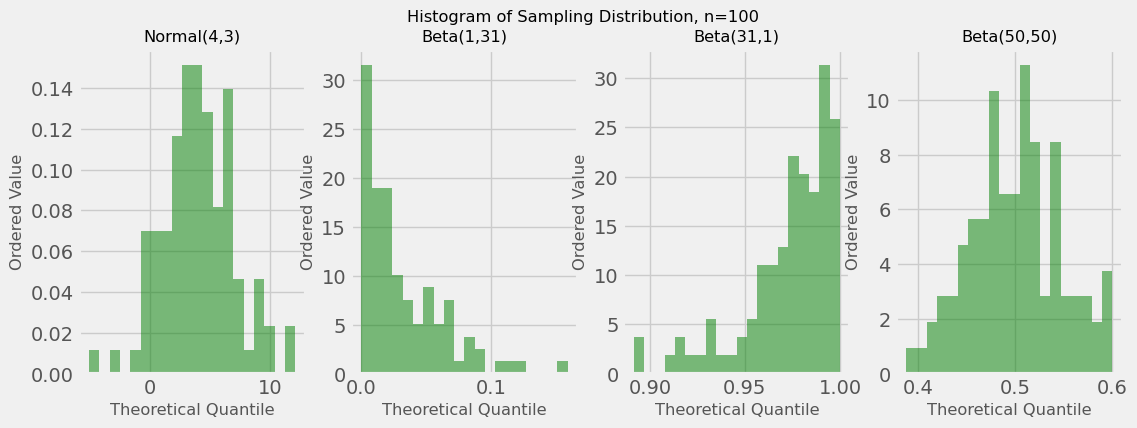

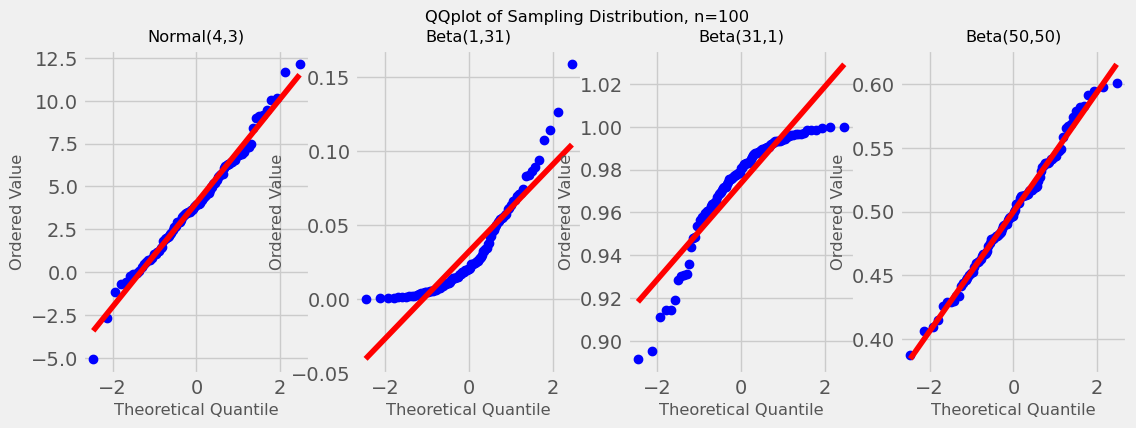

In [1035]:
#####n=100
mu = 4
sigma = 3
n = 100
rv_norm = norm.rvs(loc = mu, scale = sigma, size = n)

#a < b
alpha1 = 1
beta1 = 31
rv_beta1 = beta.rvs(alpha1, beta1, size = n)
#a > b
alpha2 = 31
beta2 = 1
rv_beta2 = beta.rvs(alpha2, beta2, size = n)

##
alpha3 = 50
beta3 = 50
rv_beta3 = beta.rvs(alpha3, beta3, size = n)

####Histogram####
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12, 4))
bins = 20
ax1.hist(rv_norm, bins = bins, density=True, color="g", alpha = 0.5)
ax1.set_title("Normal({},{})".format(mu, sigma), fontsize = 'small')
ax1.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax1.set_ylabel("Ordered Value", fontsize = 'small')

ax2.hist(rv_beta1, bins = bins, density=True, color="g", alpha = 0.5)
ax2.set_title("Beta({},{})".format(alpha1,beta1), fontsize = 'small')
ax2.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax2.set_ylabel("Ordered Value", fontsize = 'small')

ax3.hist(rv_beta2, bins = bins, density=True, color="g", alpha = 0.5)
ax3.set_title("Beta({},{})".format(alpha2,beta2), fontsize = 'small')
ax3.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax3.set_ylabel("Ordered Value", fontsize = 'small')

ax4.hist(rv_beta3, bins = bins, density=True, color="g", alpha = 0.5)
ax4.set_title("Beta({},{})".format(alpha3,beta3), fontsize = 'small')
ax4.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax4.set_ylabel("Ordered Value", fontsize = 'small')
plt.suptitle("Histogram of Sampling Distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-betanormal-hist-n=100.eps", format="eps")
plt.show()

####QQplot####
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12, 4))
stats.probplot(rv_norm, dist = "norm", plot = ax1)
ax1.set_title("Normal({},{})".format(mu, sigma), fontsize = 'small')
ax1.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax1.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_beta1, dist = "norm", plot = ax2)
ax2.set_title("Beta({},{})".format(alpha1,beta1), fontsize = 'small')
ax2.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax2.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_beta2, dist = "norm", plot = ax3)
ax3.set_title("Beta({},{})".format(alpha2,beta2), fontsize = 'small')
ax3.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax3.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_beta3, dist = "norm", plot = ax4)
ax4.set_title("Beta({},{})".format(alpha3,beta3), fontsize = 'small')
ax4.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax4.set_ylabel("Ordered Value", fontsize = 'small')
plt.suptitle("QQplot of Sampling Distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-betanormal-qqplot-n=100.eps", format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


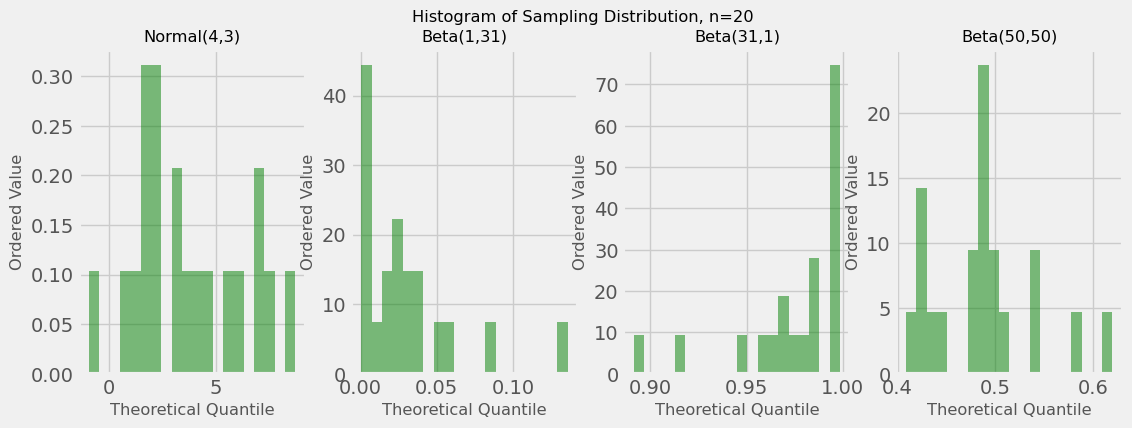

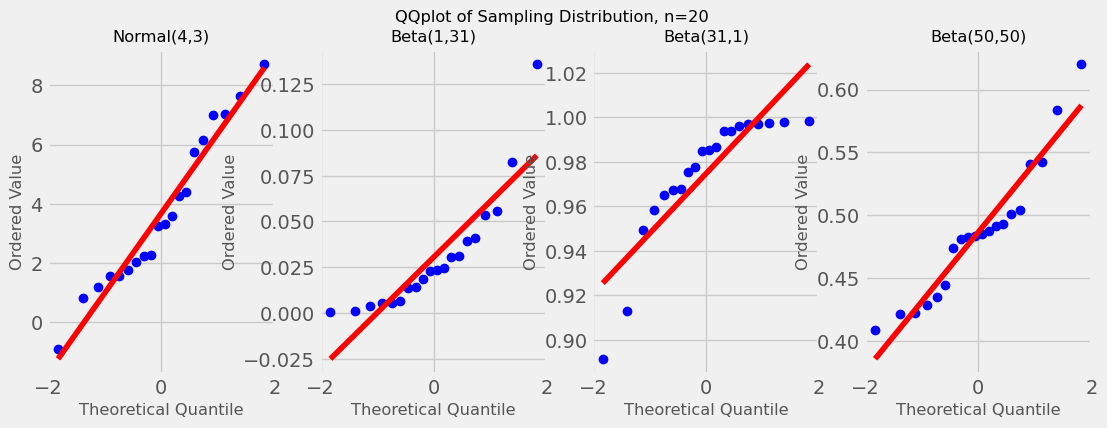

In [1036]:
##n=20
mu = 4
sigma = 3
n = 20
rv_norm = norm.rvs(loc = mu, scale = sigma, size = n)

#a < b
alpha1 = 1
beta1 = 31
rv_beta1 = beta.rvs(alpha1, beta1, size = n)
#a > b
alpha2 = 31
beta2 = 1
rv_beta2 = beta.rvs(alpha2, beta2, size = n)

##
alpha3 = 50
beta3 = 50
rv_beta3 = beta.rvs(alpha3, beta3, size = n)

####Histogram####
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12, 4))
bins = 20
ax1.hist(rv_norm, bins = bins, density=True, color="g", alpha = 0.5)
ax1.set_title("Normal({},{})".format(mu, sigma), fontsize = 'small')
ax1.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax1.set_ylabel("Ordered Value", fontsize = 'small')

ax2.hist(rv_beta1, bins = bins, density=True, color="g", alpha = 0.5)
ax2.set_title("Beta({},{})".format(alpha1,beta1), fontsize = 'small')
ax2.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax2.set_ylabel("Ordered Value", fontsize = 'small')

ax3.hist(rv_beta2, bins = bins, density=True, color="g", alpha = 0.5)
ax3.set_title("Beta({},{})".format(alpha2,beta2), fontsize = 'small')
ax3.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax3.set_ylabel("Ordered Value", fontsize = 'small')

ax4.hist(rv_beta3, bins = bins, density=True, color="g", alpha = 0.5)
ax4.set_title("Beta({},{})".format(alpha3,beta3), fontsize = 'small')
ax4.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax4.set_ylabel("Ordered Value", fontsize = 'small')
plt.suptitle("Histogram of Sampling Distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-betanormal-hist-n=20.eps", format="eps")
plt.show()

####QQplot####
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12, 4))
stats.probplot(rv_norm, dist = "norm", plot = ax1)
ax1.set_title("Normal({},{})".format(mu, sigma), fontsize = 'small')
ax1.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax1.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_beta1, dist = "norm", plot = ax2)
ax2.set_title("Beta({},{})".format(alpha1,beta1), fontsize = 'small')
ax2.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax2.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_beta2, dist = "norm", plot = ax3)
ax3.set_title("Beta({},{})".format(alpha2,beta2), fontsize = 'small')
ax3.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax3.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_beta3, dist = "norm", plot = ax4)
ax4.set_title("Beta({},{})".format(alpha3,beta3), fontsize = 'small')
ax4.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax4.set_ylabel("Ordered Value", fontsize = 'small')
plt.suptitle("QQplot of Sampling Distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-betanormal-qqplot-n=20.eps", format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


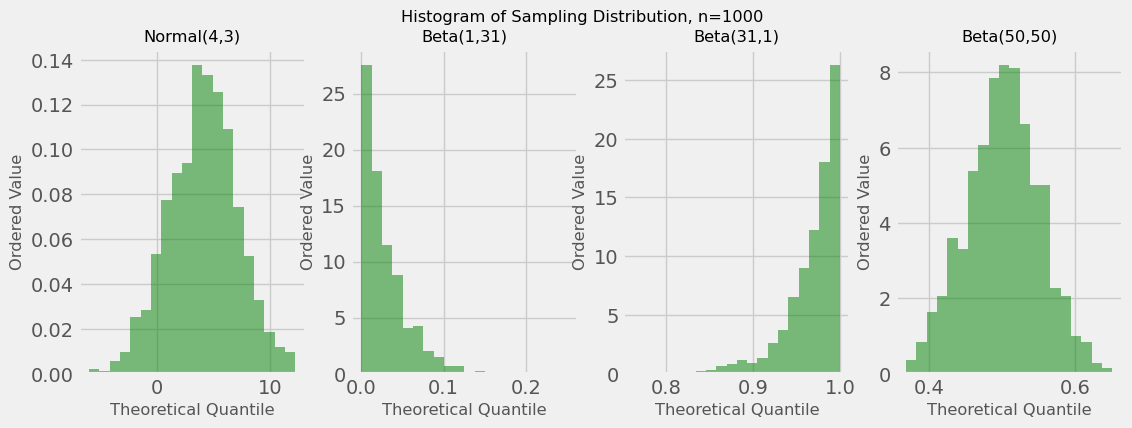

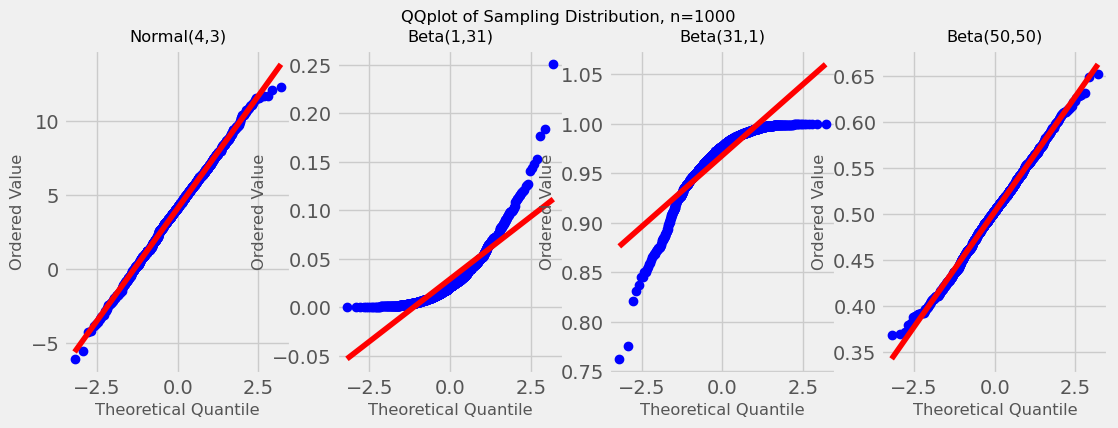

In [1037]:
######n=1000
mu = 4
sigma = 3
n = 1000
rv_norm = norm.rvs(loc = mu, scale = sigma, size = n)

#a < b
alpha1 = 1
beta1 = 31
rv_beta1 = beta.rvs(alpha1, beta1, size = n)
#a > b
alpha2 = 31
beta2 = 1
rv_beta2 = beta.rvs(alpha2, beta2, size = n)

##
alpha3 = 50
beta3 = 50
rv_beta3 = beta.rvs(alpha3, beta3, size = n)

####Histogram####
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12, 4))
bins = 20
ax1.hist(rv_norm, bins = bins, density=True, color="g", alpha = 0.5)
ax1.set_title("Normal({},{})".format(mu, sigma), fontsize = 'small')
ax1.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax1.set_ylabel("Ordered Value", fontsize = 'small')

ax2.hist(rv_beta1, bins = bins, density=True, color="g", alpha = 0.5)
ax2.set_title("Beta({},{})".format(alpha1,beta1), fontsize = 'small')
ax2.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax2.set_ylabel("Ordered Value", fontsize = 'small')

ax3.hist(rv_beta2, bins = bins, density=True, color="g", alpha = 0.5)
ax3.set_title("Beta({},{})".format(alpha2,beta2), fontsize = 'small')
ax3.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax3.set_ylabel("Ordered Value", fontsize = 'small')

ax4.hist(rv_beta3, bins = bins, density=True, color="g", alpha = 0.5)
ax4.set_title("Beta({},{})".format(alpha3,beta3), fontsize = 'small')
ax4.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax4.set_ylabel("Ordered Value", fontsize = 'small')
plt.suptitle("Histogram of Sampling Distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-betanormal-hist-n=1000.eps", format="eps")
plt.show()

####QQplot####
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12, 4))
stats.probplot(rv_norm, dist = "norm", plot = ax1)
ax1.set_title("Normal({},{})".format(mu, sigma), fontsize = 'small')
ax1.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax1.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_beta1, dist = "norm", plot = ax2)
ax2.set_title("Beta({},{})".format(alpha1,beta1), fontsize = 'small')
ax2.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax2.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_beta2, dist = "norm", plot = ax3)
ax3.set_title("Beta({},{})".format(alpha2,beta2), fontsize = 'small')
ax3.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax3.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_beta3, dist = "norm", plot = ax4)
ax4.set_title("Beta({},{})".format(alpha3,beta3), fontsize = 'small')
ax4.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax4.set_ylabel("Ordered Value", fontsize = 'small')
plt.suptitle("QQplot of Sampling Distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-betanormal-qqplot-n=1000.eps", format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


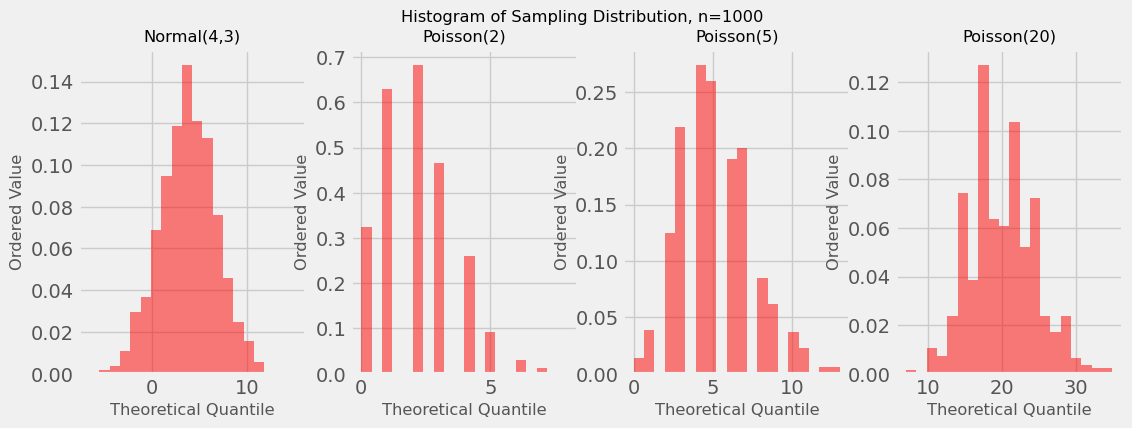

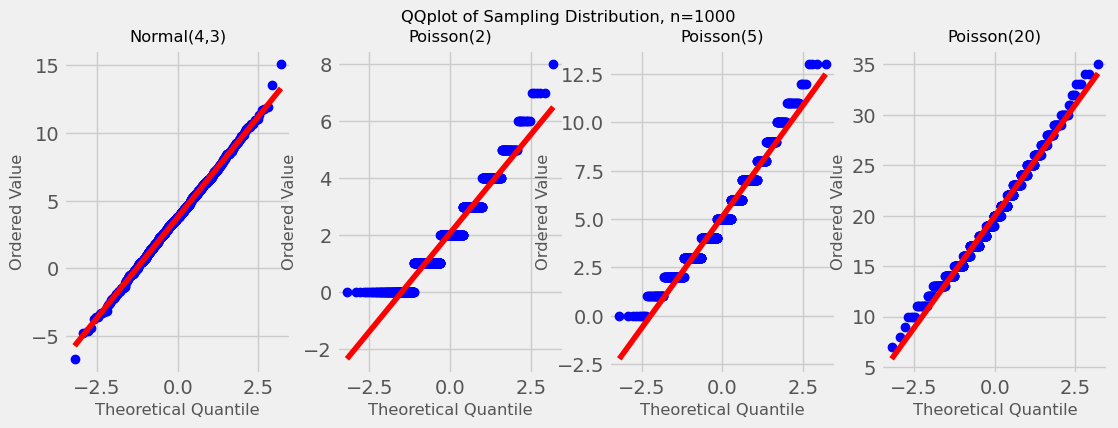

In [1038]:
######n=1000
mu = 4
sigma = 3
n = 1000
rv_norm = norm.rvs(loc = mu, scale = sigma, size = n)

lamb1 = 2
lamb2 = 5
lamb3 = 20

rv_poi1 = poisson.rvs(lamb1, size = n)
rv_poi2 = poisson.rvs(lamb2, size = n)
rv_poi3 = poisson.rvs(lamb3, size = n)

####Histogram####
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12, 4))
bins = 20
ax1.hist(rv_norm, bins = bins, density=True, color="r", alpha = 0.5)
ax1.set_title("Normal({},{})".format(mu, sigma), fontsize = 'small')
ax1.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax1.set_ylabel("Ordered Value", fontsize = 'small')

ax2.hist(rv_poi1, bins = bins, density=True, color="r", alpha = 0.5)
ax2.set_title("Poisson({})".format(lamb1), fontsize = 'small')
ax2.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax2.set_ylabel("Ordered Value", fontsize = 'small')

ax3.hist(rv_poi2, bins = bins, density=True, color="r", alpha = 0.5)
ax3.set_title("Poisson({})".format(lamb2), fontsize = 'small')
ax3.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax3.set_ylabel("Ordered Value", fontsize = 'small')

ax4.hist(rv_poi3, bins = bins, density=True, color="r", alpha = 0.5)
ax4.set_title("Poisson({})".format(lamb3), fontsize = 'small')
ax4.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax4.set_ylabel("Ordered Value", fontsize = 'small')
plt.suptitle("Histogram of Sampling Distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-poinormal-hist-n=1000.eps", format="eps")
plt.show()

####QQplot####
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12, 4))
stats.probplot(rv_norm, dist = "norm", plot = ax1)
ax1.set_title("Normal({},{})".format(mu, sigma), fontsize = 'small')
ax1.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax1.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_poi1, dist = "norm", plot = ax2)
ax2.set_title("Poisson({})".format(lamb1), fontsize = 'small')
ax2.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax2.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_poi2, dist = "norm", plot = ax3)
ax3.set_title("Poisson({})".format(lamb2), fontsize = 'small')
ax3.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax3.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_poi3, dist = "norm", plot = ax4)
ax4.set_title("Poisson({})".format(lamb3), fontsize = 'small')
ax4.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax4.set_ylabel("Ordered Value", fontsize = 'small')
plt.suptitle("QQplot of Sampling Distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-poinormal-qqplot-n=1000.eps", format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


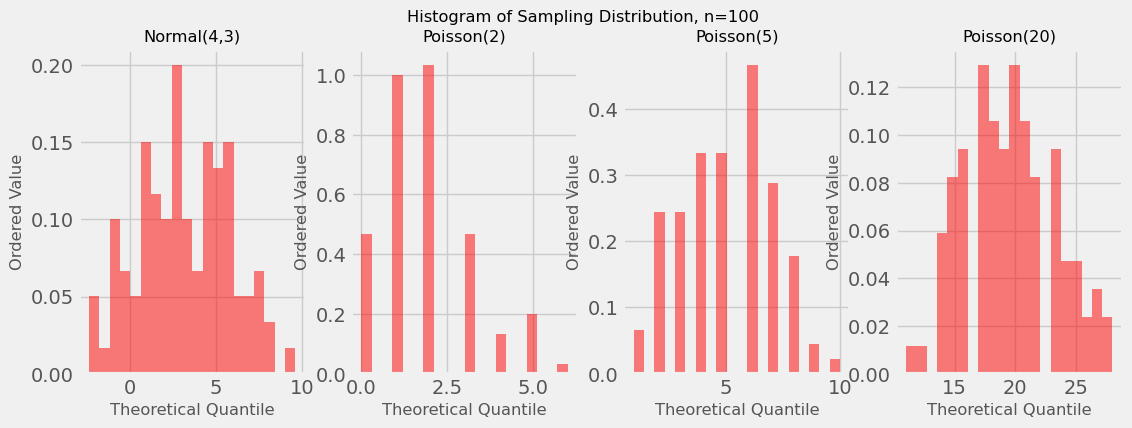

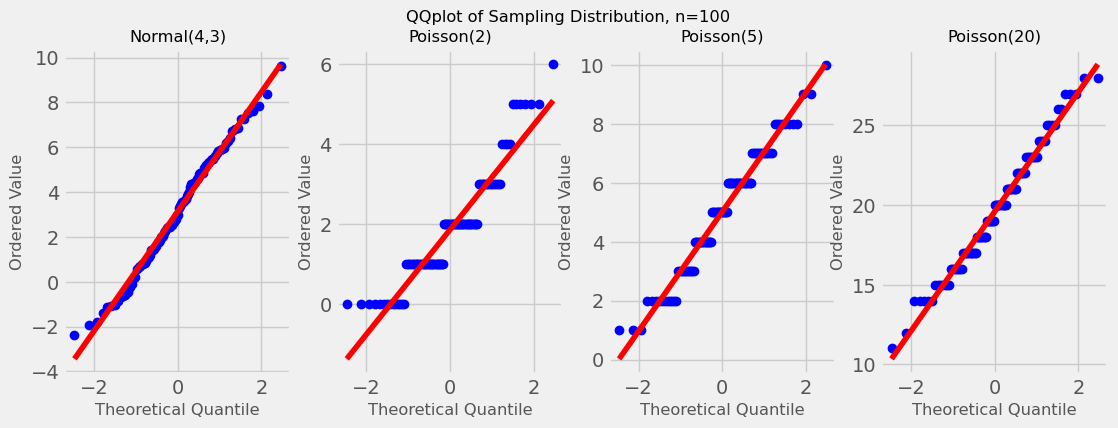

In [1039]:
######n=100
mu = 4
sigma = 3
n = 100
rv_norm = norm.rvs(loc = mu, scale = sigma, size = n)

lamb1 = 2
lamb2 = 5
lamb3 = 20

rv_poi1 = poisson.rvs(lamb1, size = n)
rv_poi2 = poisson.rvs(lamb2, size = n)
rv_poi3 = poisson.rvs(lamb3, size = n)

####Histogram####
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12, 4))
bins = 20
ax1.hist(rv_norm, bins = bins, density=True, color="r", alpha = 0.5)
ax1.set_title("Normal({},{})".format(mu, sigma), fontsize = 'small')
ax1.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax1.set_ylabel("Ordered Value", fontsize = 'small')

ax2.hist(rv_poi1, bins = bins, density=True, color="r", alpha = 0.5)
ax2.set_title("Poisson({})".format(lamb1), fontsize = 'small')
ax2.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax2.set_ylabel("Ordered Value", fontsize = 'small')

ax3.hist(rv_poi2, bins = bins, density=True, color="r", alpha = 0.5)
ax3.set_title("Poisson({})".format(lamb2), fontsize = 'small')
ax3.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax3.set_ylabel("Ordered Value", fontsize = 'small')

ax4.hist(rv_poi3, bins = bins, density=True, color="r", alpha = 0.5)
ax4.set_title("Poisson({})".format(lamb3), fontsize = 'small')
ax4.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax4.set_ylabel("Ordered Value", fontsize = 'small')
plt.suptitle("Histogram of Sampling Distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-poinormal-hist-n=100.eps", format="eps")
plt.show()

####QQplot####
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12, 4))
stats.probplot(rv_norm, dist = "norm", plot = ax1)
ax1.set_title("Normal({},{})".format(mu, sigma), fontsize = 'small')
ax1.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax1.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_poi1, dist = "norm", plot = ax2)
ax2.set_title("Poisson({})".format(lamb1), fontsize = 'small')
ax2.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax2.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_poi2, dist = "norm", plot = ax3)
ax3.set_title("Poisson({})".format(lamb2), fontsize = 'small')
ax3.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax3.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_poi3, dist = "norm", plot = ax4)
ax4.set_title("Poisson({})".format(lamb3), fontsize = 'small')
ax4.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax4.set_ylabel("Ordered Value", fontsize = 'small')
plt.suptitle("QQplot of Sampling Distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-poinormal-qqplot-n=100.eps", format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


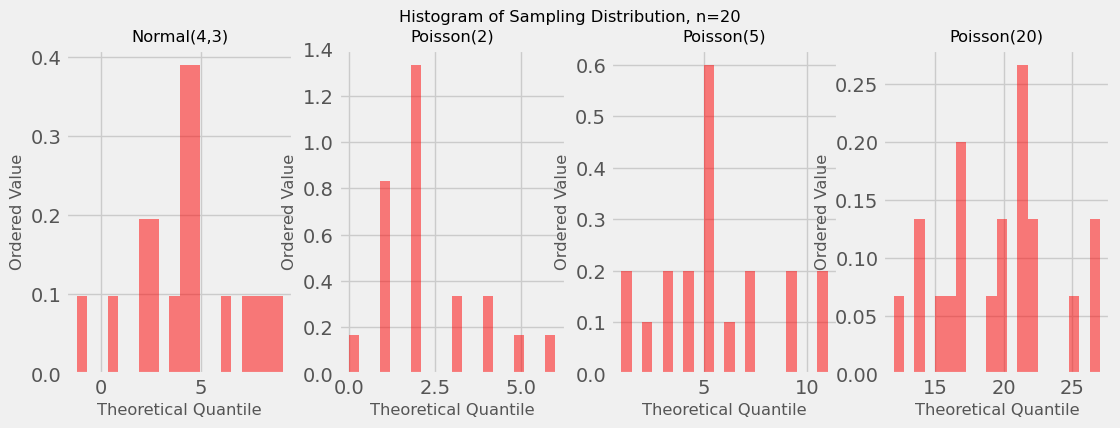

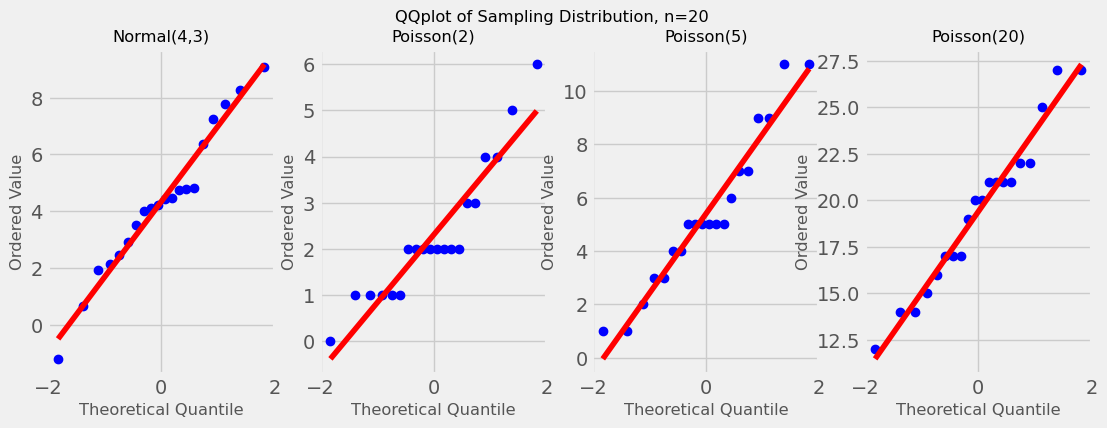

In [1040]:
######n=1000
mu = 4
sigma = 3
n = 20
rv_norm = norm.rvs(loc = mu, scale = sigma, size = n)

lamb1 = 2
lamb2 = 5
lamb3 = 20

rv_poi1 = poisson.rvs(lamb1, size = n)
rv_poi2 = poisson.rvs(lamb2, size = n)
rv_poi3 = poisson.rvs(lamb3, size = n)

####Histogram####
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12, 4))
bins = 20
ax1.hist(rv_norm, bins = bins, density=True, color="r", alpha = 0.5)
ax1.set_title("Normal({},{})".format(mu, sigma), fontsize = 'small')
ax1.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax1.set_ylabel("Ordered Value", fontsize = 'small')

ax2.hist(rv_poi1, bins = bins, density=True, color="r", alpha = 0.5)
ax2.set_title("Poisson({})".format(lamb1), fontsize = 'small')
ax2.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax2.set_ylabel("Ordered Value", fontsize = 'small')

ax3.hist(rv_poi2, bins = bins, density=True, color="r", alpha = 0.5)
ax3.set_title("Poisson({})".format(lamb2), fontsize = 'small')
ax3.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax3.set_ylabel("Ordered Value", fontsize = 'small')

ax4.hist(rv_poi3, bins = bins, density=True, color="r", alpha = 0.5)
ax4.set_title("Poisson({})".format(lamb3), fontsize = 'small')
ax4.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax4.set_ylabel("Ordered Value", fontsize = 'small')
plt.suptitle("Histogram of Sampling Distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-poinormal-hist-n=20.eps", format="eps")
plt.show()

####QQplot####
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12, 4))
stats.probplot(rv_norm, dist = "norm", plot = ax1)
ax1.set_title("Normal({},{})".format(mu, sigma), fontsize = 'small')
ax1.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax1.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_poi1, dist = "norm", plot = ax2)
ax2.set_title("Poisson({})".format(lamb1), fontsize = 'small')
ax2.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax2.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_poi2, dist = "norm", plot = ax3)
ax3.set_title("Poisson({})".format(lamb2), fontsize = 'small')
ax3.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax3.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_poi3, dist = "norm", plot = ax4)
ax4.set_title("Poisson({})".format(lamb3), fontsize = 'small')
ax4.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax4.set_ylabel("Ordered Value", fontsize = 'small')
plt.suptitle("QQplot of Sampling Distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-poinormal-qqplot-n=20.eps", format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


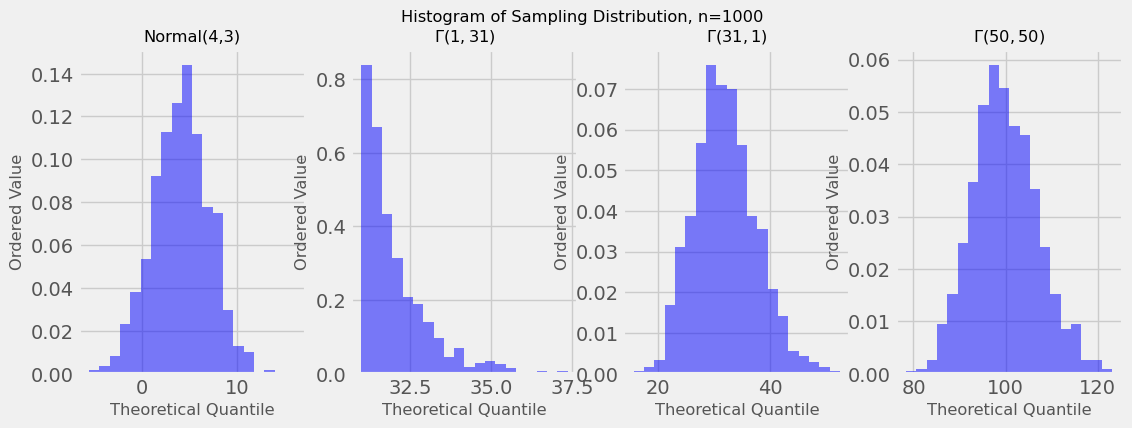

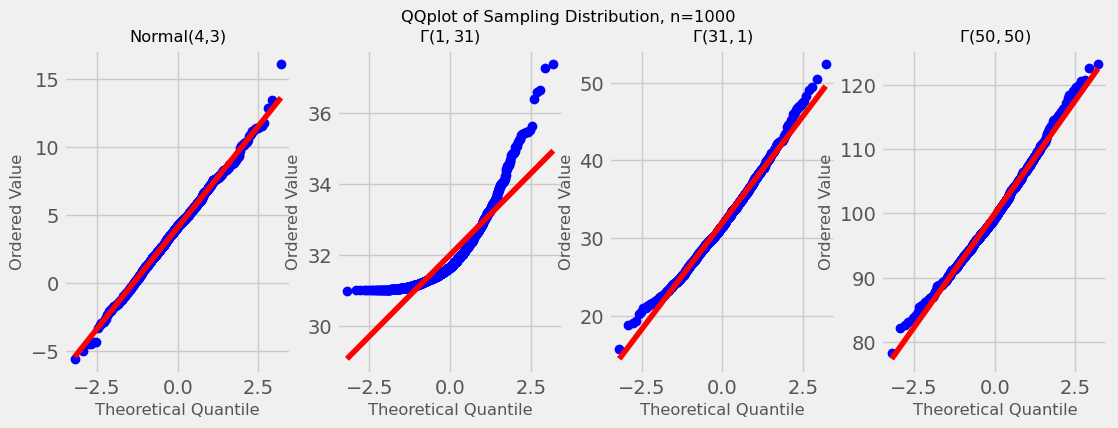

In [1041]:
######n=1000
mu = 4
sigma = 3
n = 1000
rv_norm = norm.rvs(loc = mu, scale = sigma, size = n)

#a < b
alpha1 = 1
beta1 = 31
rv_gamma1 = gamma.rvs(alpha1, beta1, size = n)
#a > b
alpha2 = 31
beta2 = 1
rv_gamma2 = gamma.rvs(alpha2, beta2, size = n)

##
alpha3 = 50
beta3 = 50
rv_gamma3 = gamma.rvs(alpha3, beta3, size = n)

####Histogram####
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12, 4))
bins = 20
ax1.hist(rv_norm, bins = bins, density=True, color="b", alpha = 0.5)
ax1.set_title("Normal({},{})".format(mu, sigma), fontsize = 'small')
ax1.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax1.set_ylabel("Ordered Value", fontsize = 'small')

ax2.hist(rv_gamma1, bins = bins, density=True, color="b", alpha = 0.5)
ax2.set_title("$\Gamma({},{})$".format(alpha1,beta1), fontsize = 'small')
ax2.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax2.set_ylabel("Ordered Value", fontsize = 'small')

ax3.hist(rv_gamma2, bins = bins, density=True, color="b", alpha = 0.5)
ax3.set_title("$\Gamma({},{})$".format(alpha2,beta2), fontsize = 'small')
ax3.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax3.set_ylabel("Ordered Value", fontsize = 'small')

ax4.hist(rv_gamma3, bins = bins, density=True, color="b", alpha = 0.5)
ax4.set_title("$\Gamma({},{})$".format(alpha3,beta3), fontsize = 'small')
ax4.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax4.set_ylabel("Ordered Value", fontsize = 'small')
plt.suptitle("Histogram of Sampling Distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-gammanormal-hist-n=1000.eps", format="eps")
plt.show()

####QQplot####
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12, 4))
stats.probplot(rv_norm, dist = "norm", plot = ax1)
ax1.set_title("Normal({},{})".format(mu, sigma), fontsize = 'small')
ax1.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax1.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_gamma1, dist = "norm", plot = ax2)
ax2.set_title("$\Gamma({},{})$".format(alpha1,beta1), fontsize = 'small')
ax2.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax2.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_gamma2, dist = "norm", plot = ax3)
ax3.set_title("$\Gamma({},{})$".format(alpha2,beta2), fontsize = 'small')
ax3.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax3.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_gamma3, dist = "norm", plot = ax4)
ax4.set_title("$\Gamma({},{})$".format(alpha3,beta3), fontsize = 'small')
ax4.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax4.set_ylabel("Ordered Value", fontsize = 'small')
plt.suptitle("QQplot of Sampling Distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-gammanormal-qqplot-n=1000.eps", format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


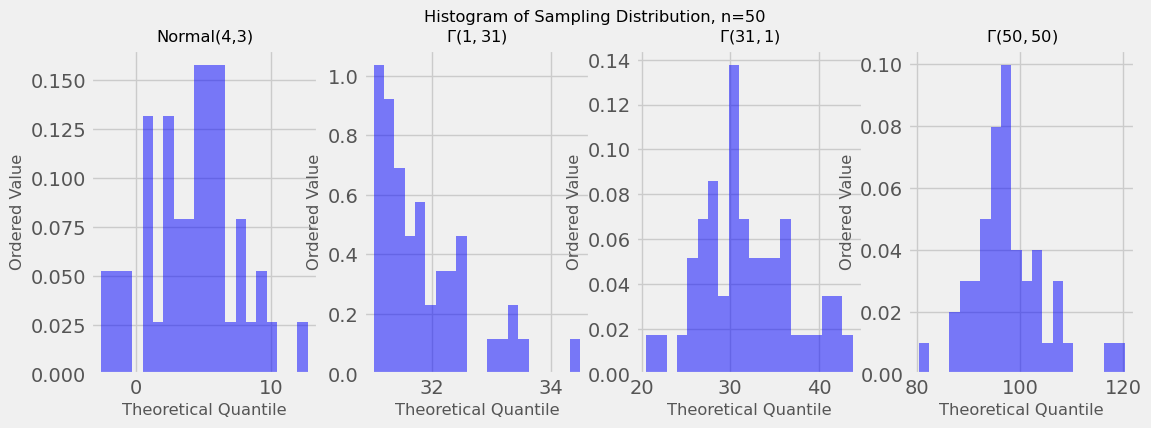

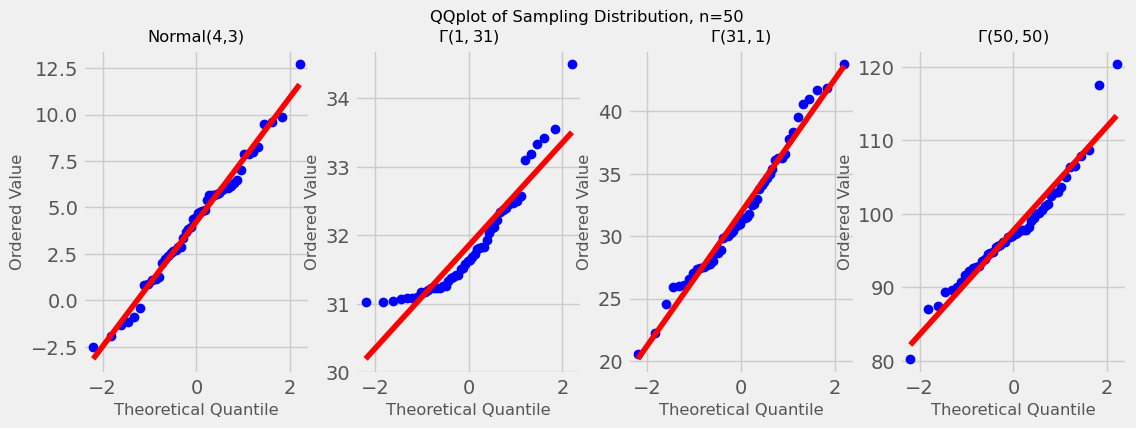

In [1042]:
######n=1000
mu = 4
sigma = 3
n = 50
rv_norm = norm.rvs(loc = mu, scale = sigma, size = n)

#a < b
alpha1 = 1
beta1 = 31
rv_gamma1 = gamma.rvs(alpha1, beta1, size = n)
#a > b
alpha2 = 31
beta2 = 1
rv_gamma2 = gamma.rvs(alpha2, beta2, size = n)

##
alpha3 = 50
beta3 = 50
rv_gamma3 = gamma.rvs(alpha3, beta3, size = n)

####Histogram####
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12, 4))
bins = 20
ax1.hist(rv_norm, bins = bins, density=True, color="b", alpha = 0.5)
ax1.set_title("Normal({},{})".format(mu, sigma), fontsize = 'small')
ax1.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax1.set_ylabel("Ordered Value", fontsize = 'small')

ax2.hist(rv_gamma1, bins = bins, density=True, color="b", alpha = 0.5)
ax2.set_title("$\Gamma({},{})$".format(alpha1,beta1), fontsize = 'small')
ax2.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax2.set_ylabel("Ordered Value", fontsize = 'small')

ax3.hist(rv_gamma2, bins = bins, density=True, color="b", alpha = 0.5)
ax3.set_title("$\Gamma({},{})$".format(alpha2,beta2), fontsize = 'small')
ax3.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax3.set_ylabel("Ordered Value", fontsize = 'small')

ax4.hist(rv_gamma3, bins = bins, density=True, color="b", alpha = 0.5)
ax4.set_title("$\Gamma({},{})$".format(alpha3,beta3), fontsize = 'small')
ax4.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax4.set_ylabel("Ordered Value", fontsize = 'small')
plt.suptitle("Histogram of Sampling Distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-gammanormal-hist-n=50.eps", format="eps")
plt.show()

####QQplot####
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12, 4))
stats.probplot(rv_norm, dist = "norm", plot = ax1)
ax1.set_title("Normal({},{})".format(mu, sigma), fontsize = 'small')
ax1.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax1.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_gamma1, dist = "norm", plot = ax2)
ax2.set_title("$\Gamma({},{})$".format(alpha1,beta1), fontsize = 'small')
ax2.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax2.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_gamma2, dist = "norm", plot = ax3)
ax3.set_title("$\Gamma({},{})$".format(alpha2,beta2), fontsize = 'small')
ax3.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax3.set_ylabel("Ordered Value", fontsize = 'small')
stats.probplot(rv_gamma3, dist = "norm", plot = ax4)
ax4.set_title("$\Gamma({},{})$".format(alpha3,beta3), fontsize = 'small')
ax4.set_xlabel("Theoretical Quantile", fontsize = 'small')
ax4.set_ylabel("Ordered Value", fontsize = 'small')
plt.suptitle("QQplot of Sampling Distribution, n={}".format(n), fontsize = 'small')
plt.savefig(img_dir+"sampling-gammanormal-qqplot-n=50.eps", format="eps")
plt.show()

[ 6.    7.25  9.25 ...  4.5   3.5  10.5 ]


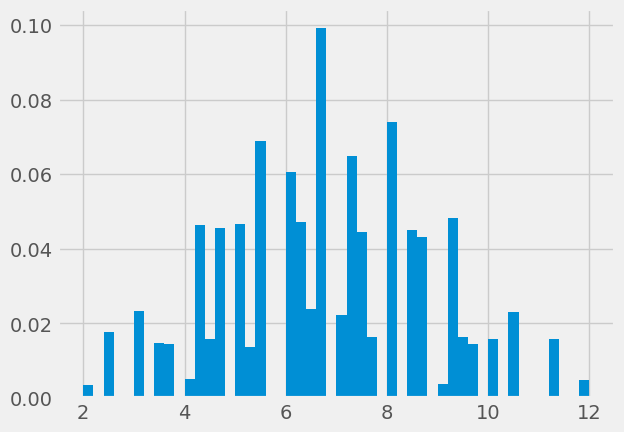

In [1093]:
##Method1
np.random.seed(seed=1294)
x = np.array([2, 4, 9, 12])
number = 10000
y = np.zeros(number)
for i in np.arange(len(y)):
    rc = np.random.choice(x, 4, replace=True)
    y[i] = rc.mean()
#plt.hist(y, bins= 50, density=True)

weight = np.ones_like(y)/len(y)
plt.hist(y, bins=50, weights=weight)
print(y)
#plt.savefig(img_dir+"sampling.eps", format="eps")


2.00 : 0.0040
2.50 : 0.0156
3.00 : 0.0236
3.50 : 0.0158
3.75 : 0.0156
4.00 : 0.0039
4.25 : 0.0470
4.50 : 0.0156
4.75 : 0.0467
5.00 : 0.0468
5.25 : 0.0157
5.50 : 0.0704
6.00 : 0.0625
6.25 : 0.0472
6.50 : 0.0233
6.75 : 0.0941
7.00 : 0.0233
7.25 : 0.0619
7.50 : 0.0469
7.75 : 0.0156
8.00 : 0.0704
8.50 : 0.0470
8.75 : 0.0467
9.00 : 0.0038
9.25 : 0.0471
9.50 : 0.0155
9.75 : 0.0158
10.00 : 0.0157
10.50 : 0.0233
11.25 : 0.0153
12.00 : 0.0039


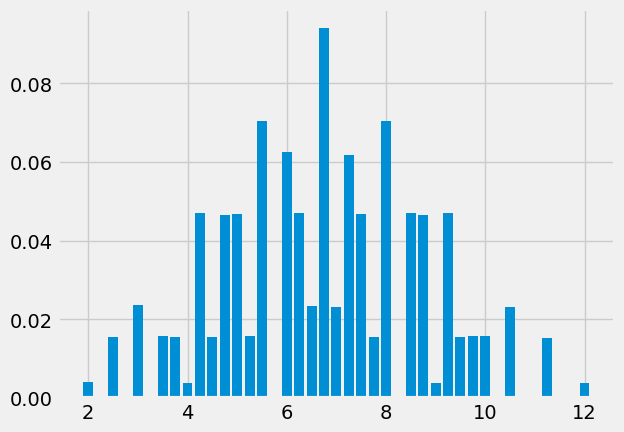

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
# r = random.choices(a, k=4)
# it takes a lot of time for loop
# nr_mu = np.zeros(N)
# for i in range(N):
#   nr_mu[i] = np.random.choice(a, 4).choice()
N = 1000000
a = [2, 4, 9, 12]
nr = np.random.choice(a, [N, 4], replace = True)
nr_mu = nr.mean(axis=1)
A = np.unique(nr_mu, return_counts=True)
allmeans = A[0]
meancount = A[1] / N
plt.style.use("fivethirtyeight") #518 style
plt.bar(allmeans, meancount, width = 0.2)
# print("{} {}".format(np.c_[A[0], A[1] / N]))
for i in range(len(A[0])):
    print("{:.2f} : {:.4f}".format(A[0][i], A[1][i] / N))

#plt.savefig(img_dir+"sampling2.eps", format="eps")
